In [227]:
library(tidyverse)
library(wesanderson)
library(ggridges)
library(ggthemes)
library(reshape)
library(lme4)
library(sjPlot)
source("../../../spydr_scripts/functions/get_os.R")
source("../../../spydr_scripts/functions/median_cl_boot.R")


In [35]:
os <- get_os()
if (os == 'linux'){home <- '/home/krista/'
} else if(os == 'osx'){home <- '/Users/67981492/'}

agg_data_path = paste0(home,'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/')
setwd(agg_data_path)

In [36]:
#  <- read_csv('clean_df.csv',col_types = cols())
# raw_df <- read_csv('raw_df_processed.csv',col_types = cols())
# epoch_df <- read_csv('epoch_df.csv',col_types = cols())

ls_obs_data <- read_csv("combined_learning_sig_obs_data.csv", col_types=cols())
(n_subjects = length(unique(ls_obs_data$ID)))
(n_conditions = length(unique(ls_obs_data$condition)))
n_clean_trials = 600
ls_obs_data$condition <- factor(ls_obs_data$condition, levels = c('lc', 'hc', 'lv', 'hv'))

Warning message:
“Duplicated column names deduplicated: 'ID' => 'ID_1' [27]”

[1] 24

[1] 4

In [38]:
sum(ls_obs_data$ID_1 == ls_obs_data$ID) == nrow(ls_obs_data)

[1] TRUE

In [39]:
ls_obs_data$ID_1 <- NULL

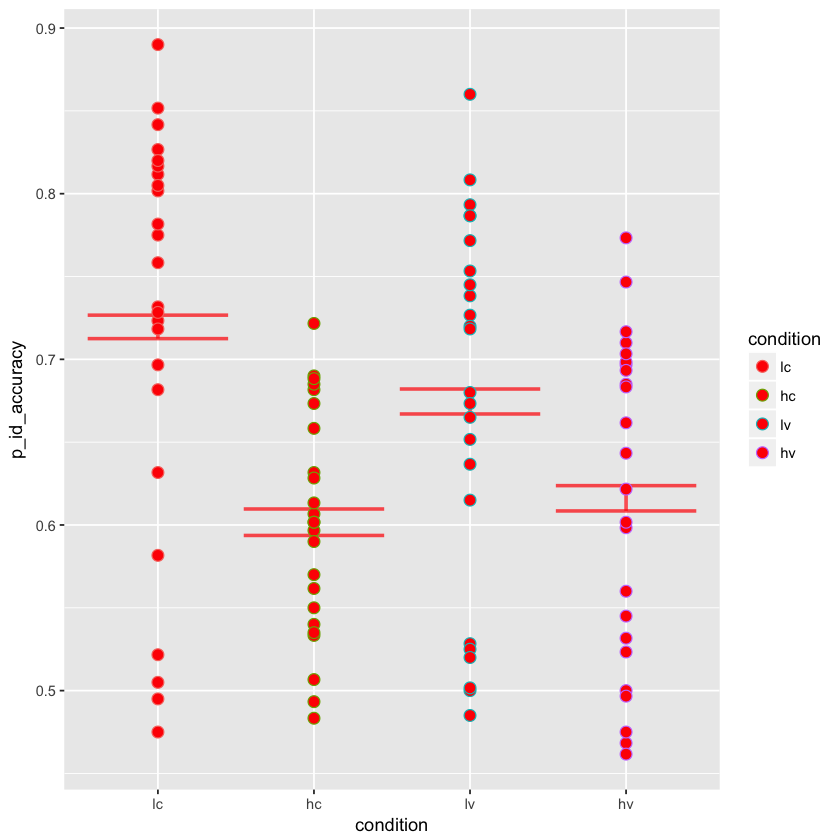

In [102]:
ggplot(ls_obs_data, aes(condition, p_id_accuracy)) +
  stat_summary(fun.data=mean_cl_boot, geom="errorbar", 
               size=1, colour="red", alpha=0.7) +
  stat_summary(aes(group=ID, color=condition), fun.y=mean, geom="point", fill="red", pch=21, size=3) 

In [31]:
rt_plot <- ggplot(ls_obs_data, aes(y=rt, x=condition, fill=condition)) + 
stat_summary(fun.data = "mean_cl_boot", aes(color= condition), size = 1) +
stat_summary(aes(group=ID, color=condition), fun.y=mean, geom="point", alpha=0.4) +
ylab('Observed Reaction Time (s)') + theme_tufte(base_size=22) + 
stat_summary(aes(label=condition, color=condition), fun.y=mean, geom="text", size=6,
             vjust = -1, hjust=-1) +  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),legend.position="none") + 
coord_cartesian(ylim = c(0.25, 0.45))  

In [88]:
acc_plot <- ggplot(ls_obs_data, aes(y=p_id_accuracy, x=condition, fill=condition)) + 
stat_summary(fun.data = "mean_cl_boot", aes(color= condition), size = 1) +
stat_summary(data=ls_obs_data, aes(group=ID, color=condition), fun.y=mean, geom="point", alpha=0.4) +
ylab('Observed Accuracy') + theme_tufte(base_size=22) + 
stat_summary(aes(label=condition, color=condition), fun.y=mean, geom="text", size=6,
             vjust = -1, hjust=-1) +  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),legend.position="none") +
coord_cartesian(ylim = c(0.45, 1))  

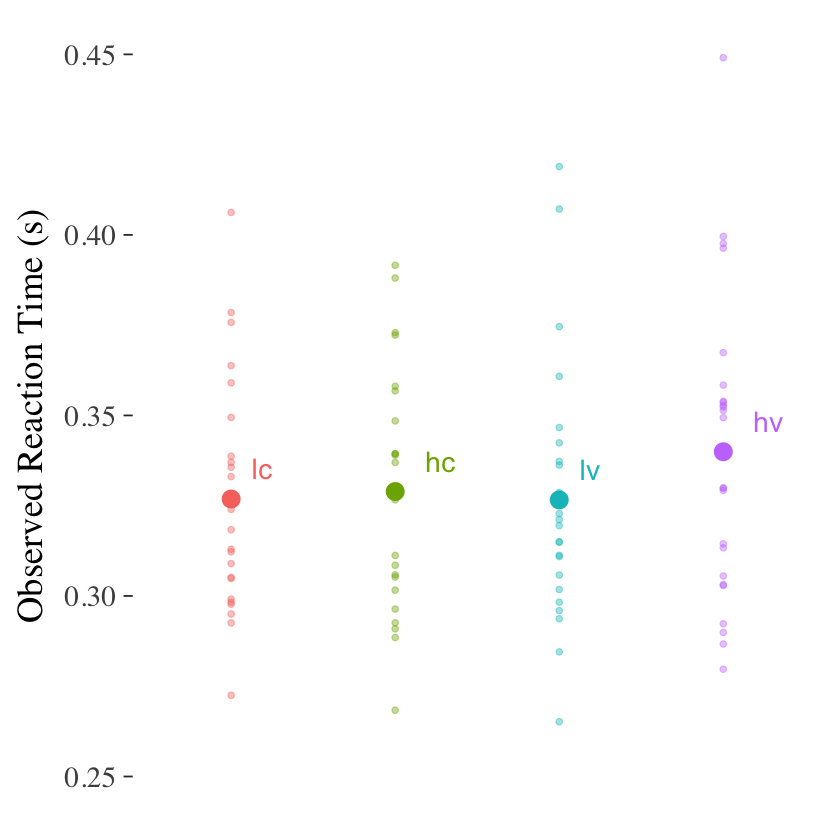

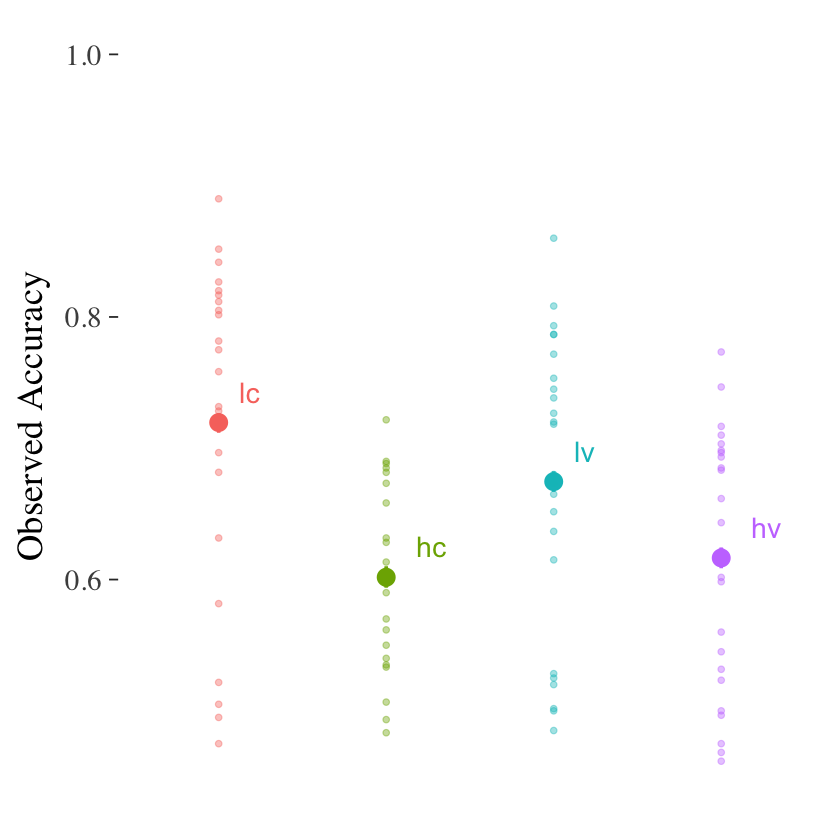

In [89]:
rt_plot
acc_plot

In [85]:
hc_error <- qnorm(0.975)*sd(ls_obs_data$rt[ls_obs_data$condition == 'hc'])/sqrt(24)
hv_error <- qnorm(0.975)*sd(ls_obs_data$rt[ls_obs_data$condition == 'hv'])/sqrt(24)

hv_error

[1] 0.04624679

In [76]:
require(nlme)
lme_rt = lme(rt ~ condition, data=ls_obs_data, random = ~1|ID)
anova(lme_rt)

require(multcomp)
summary(glht(lme_rt, linfct=mcp(condition = "Tukey")), test = adjusted(type = "bonferroni"))


numDF denDF F-value    p-value
(Intercept) 1     57573 3127.94568 0      
condition   3     57573   54.16725 0


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lme.formula(fixed = rt ~ condition, data = ls_obs_data, random = ~1 | 
    ID)

Linear Hypotheses:
               Estimate Std. Error z value Pr(>|z|)    
hc - lc == 0  0.0020715  0.0012160   1.704    0.531    
lv - lc == 0 -0.0002402  0.0012160  -0.198    1.000    
hv - lc == 0  0.0130955  0.0012160  10.769   <2e-16 ***
lv - hc == 0 -0.0023117  0.0012160  -1.901    0.344    
hv - hc == 0  0.0110240  0.0012160   9.066   <2e-16 ***
hv - lv == 0  0.0133357  0.0012160  10.967   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- bonferroni method)


In [72]:
 aov.fit <- aov(rt~condition+Error(ID/condition),data=ls_obs_data)

require(multcomp)
summary(glht( aov.fit))

ERROR: Error in modelparm.aovlist(model, ...): ‘glht’ does not support objects of class ‘aovlist’


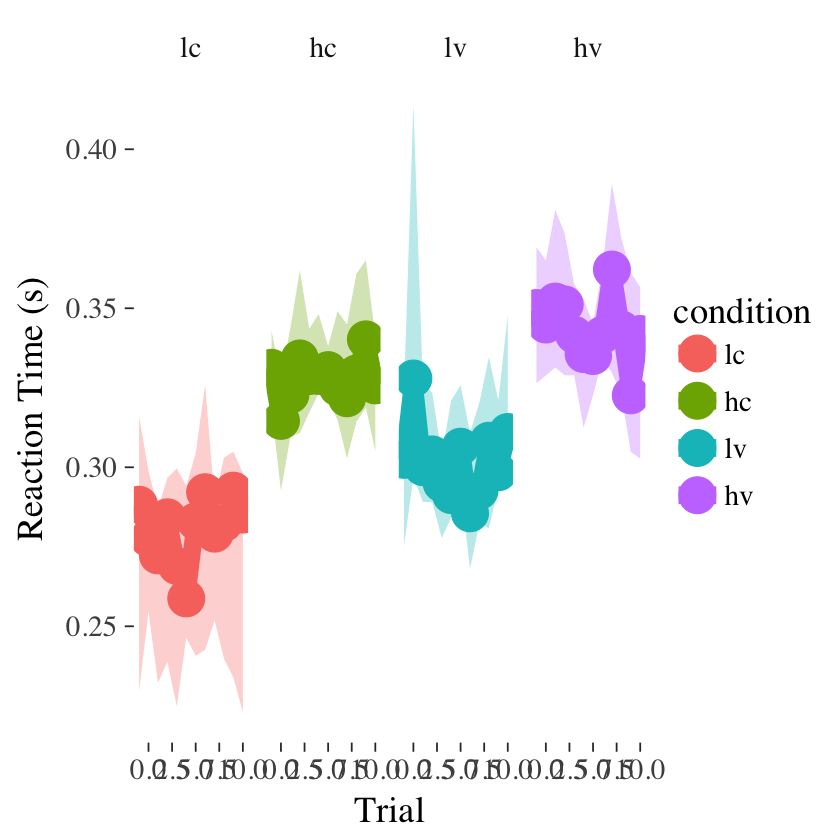

In [247]:
ggplot(subset(ls_obs_data, ID == 771 & shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx <=10), aes(y=rt, x=shifted_epoch_trial_zero_idx, fill=condition, color=condition)) + 

stat_summary(fun.data = "median_cl_boot", geom = "smooth", size=5, aes(fill=condition), alpha=0.3) + 
stat_summary(fun.y = median, geom = "point", size=10, aes(fill=condition), alpha=1) + 

 facet_grid(.~condition) + 
ylab('Reaction Time (s)') + xlab('Trial') + theme_tufte(base_size = 22) 
ggsave('rt_samples.png', height = 11, width = 30) 

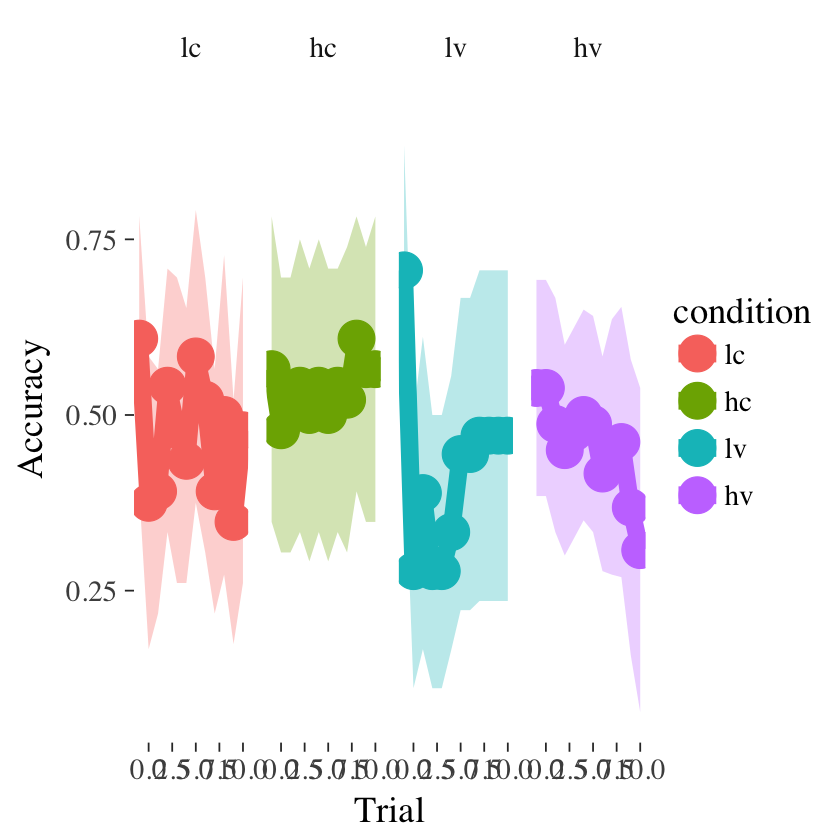

In [248]:
ggplot(subset(ls_obs_data, ID == 771 & shifted_epoch_trial_zero_idx > -2 & shifted_epoch_trial_zero_idx <=10), aes(y=p_id_accuracy, x=shifted_epoch_trial_zero_idx, fill=condition, color=condition)) + 

stat_summary(fun.data = "mean_cl_boot", geom = "smooth", size=5, aes(fill=condition), alpha=0.3) + stat_summary(fun.data = "mean_cl_boot", geom = "point", size=10) +
 facet_grid(.~condition) + 
ylab('Accuracy') + xlab('Trial') + theme_tufte(base_size = 22) 
ggsave('acc_samples.png', height = 11, width = 30) 

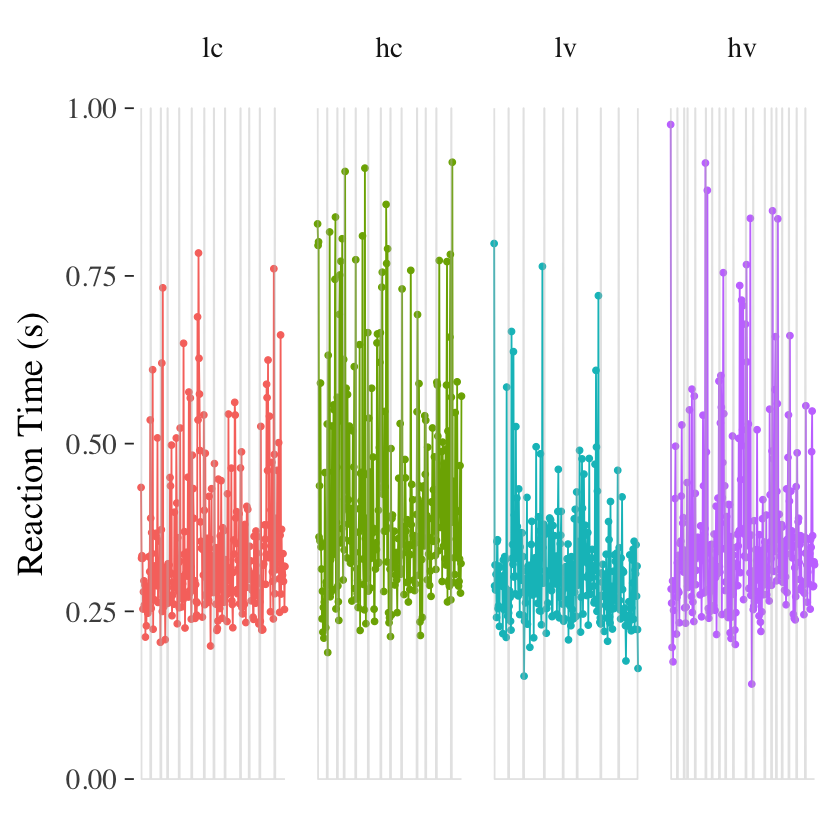

In [255]:
ggplot(subset(ls_obs_data, ID == 762 & repeat_trial < 300), aes(y=rt, x=repeat_trial, fill=condition, color=condition)) + geom_point() + geom_line()+ geom_line(aes(repeat_trial, cp_with_slow_fast), alpha=0.4, color='gray') + facet_grid(.~condition) + 
ylab('Reaction Time (s)') + xlab('Trial') + theme_tufte(base_size = 22) +  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),legend.position="none", plot.title = element_blank()) 
ggsave('rt_samples.png', height = 11, width = 30) 

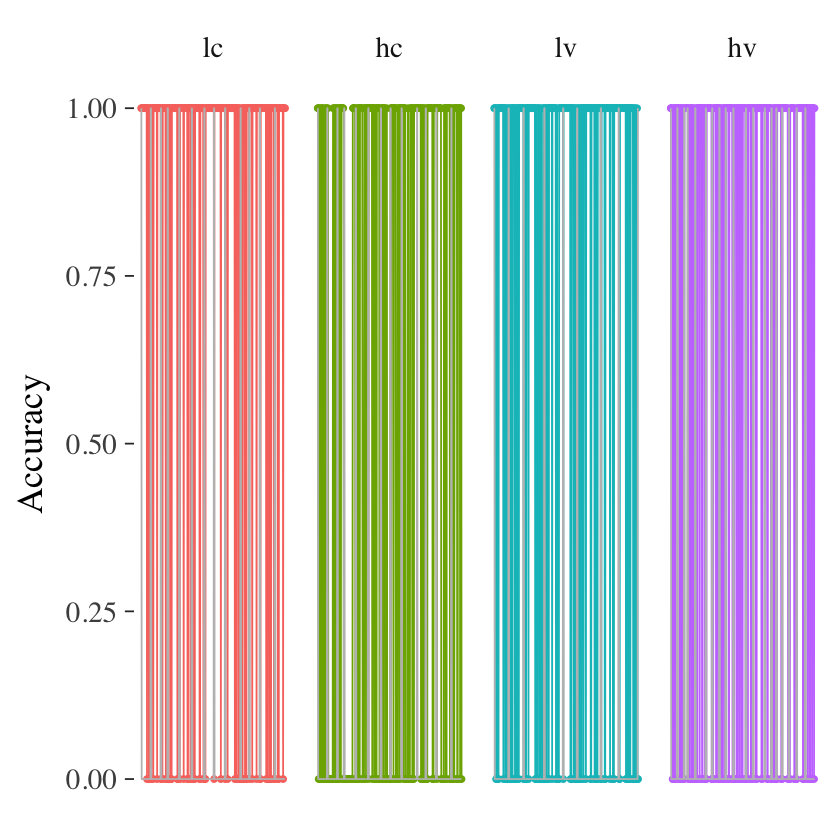

In [254]:
ggplot(subset(ls_obs_data, ID == 762 & repeat_trial < 300), aes(y=p_id_accuracy, x=repeat_trial, fill=condition, color=condition)) + geom_point() + geom_line()+ geom_line(aes(repeat_trial, cp_with_slow_fast), color='gray') + facet_grid(.~condition) + 
ylab('Accuracy') + xlab('Trial') + theme_tufte(base_size = 22) +  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),legend.position="none", plot.title = element_blank()) 
ggsave('acc_samples.png', height = 11, width = 30) 

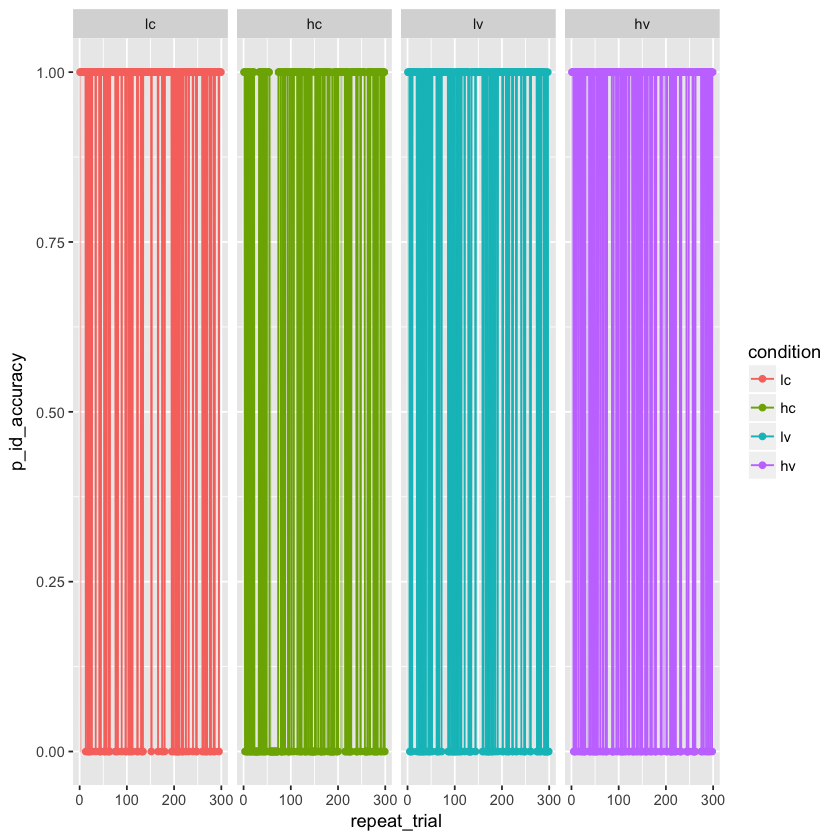

In [181]:
ggplot(subset(ls_obs_data, ID == 762 & repeat_trial < 300), aes(y=p_id_accuracy, x=repeat_trial, fill=condition, color=condition)) + geom_point() + geom_line()+ geom_line(aes(repeat_trial, cp_with_slow_fast), alpha=0.4) + facet_grid(.~condition) 

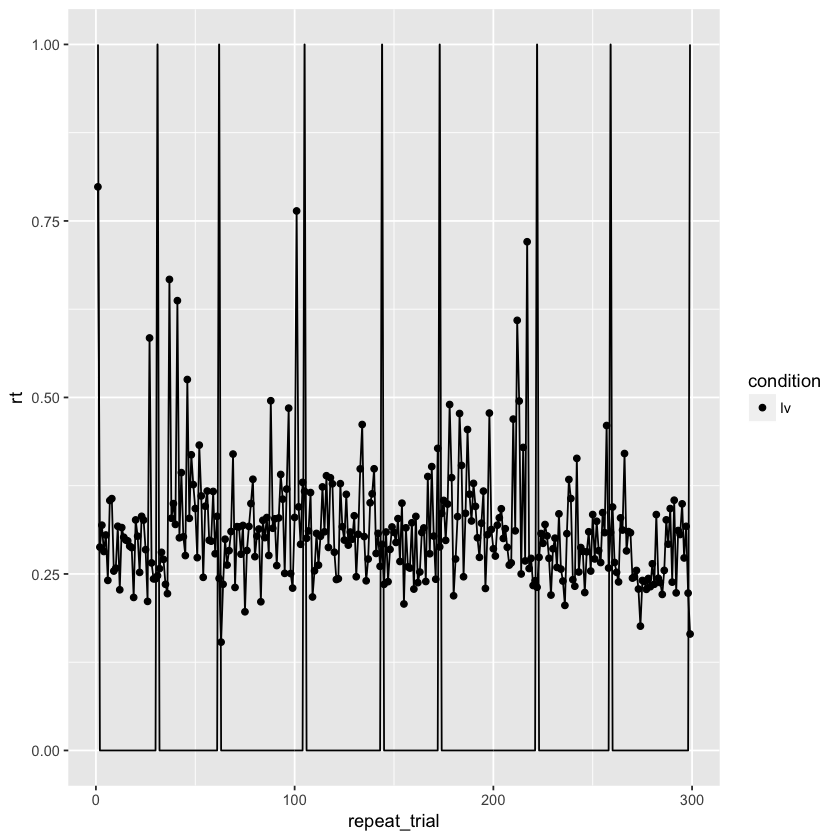

In [173]:
ggplot(subset(ls_obs_data, condition=='lv' & ID == 762 & repeat_trial < 300), aes(y=rt, x=repeat_trial, fill=condition)) + geom_point() + geom_line()+ geom_line(aes(repeat_trial, cp_with_slow_fast))  

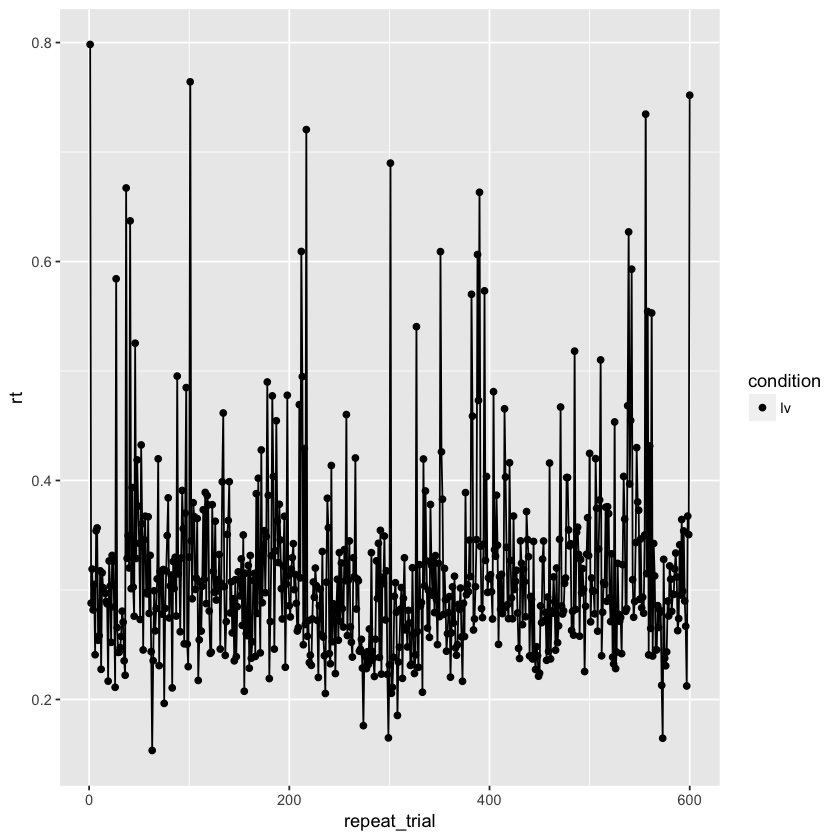

In [168]:
ggplot(subset(ls_obs_data, condition=='lv' & ID == 762), aes(y=rt, x=repeat_trial, fill=condition))  + geom_line() + geom_point()

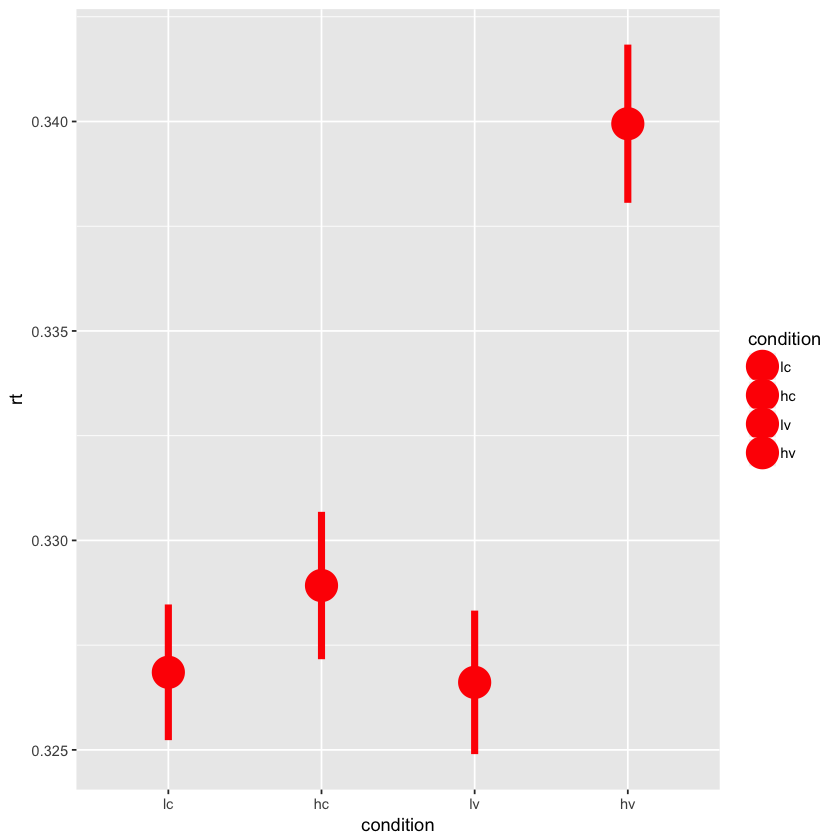

In [87]:
ggplot(ls_obs_data, aes(y=rt, x=condition, fill=condition)) + stat_summary(fun.data = "mean_cl_normal", colour = "red", size = 2)

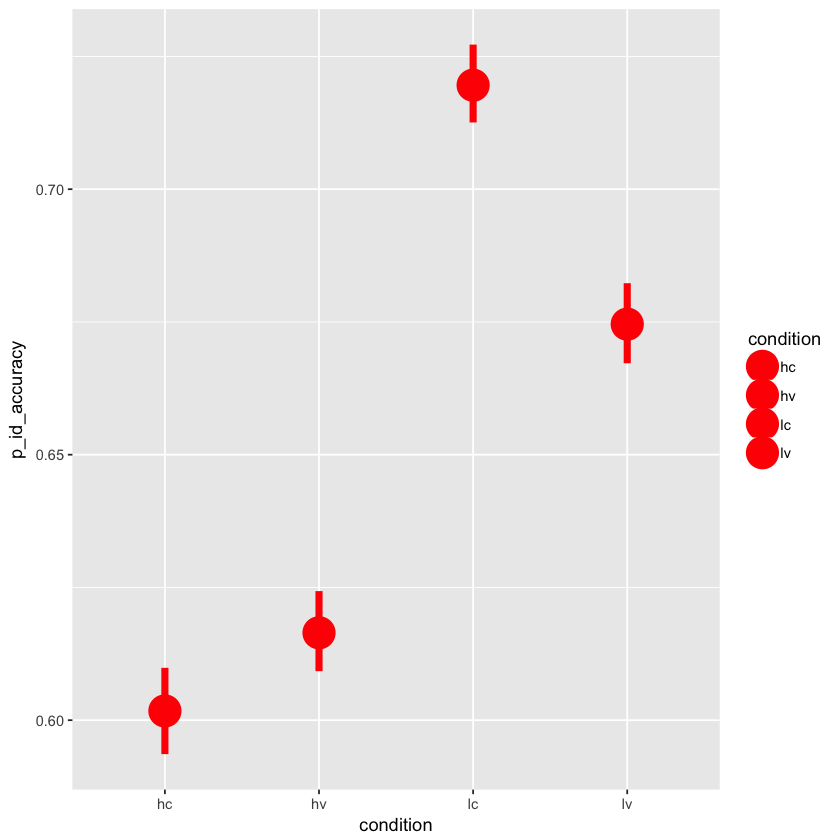

In [70]:
ggplot(ls_obs_data, aes(y=p_id_accuracy, x=condition, fill=condition)) + 
stat_summary(fun.data = "mean_cl_boot", colour = "red", size = 2)

In [82]:
names(ls_obs_data)

[1] "cpp"                          "target_B"                    
 [3] "choice_B"                     "cp"                          
 [5] "gen_drift"                    "gen_bound"                   
 [7] "ID"                           "b_t0"                        
 [9] "b_t1"                         "r_t1"                        
[11] "r_t2"                         "obs_cp"                      
[13] "ideal_B"                      "B_ideal_target"              
[15] "B_nonideal_target"            "LR_choice"                   
[17] "obs_LR_accuracy"              "obs_LR_solution"             
[19] "reward"                       "cumulative_reward"           
[21] "rt"                           "total_trial_time"            
[23] "iti"                          "cp_with_slow_fast"           
[25] "obs_cp_with_slow_fast"        "obs_high_val_cue"            
[27] "condition"                    "coded_condition"             
[29] "original_trial"               "epoch_n"                     
[31] "epoch_trial"                  "shifted_epoch_trial"         
[33] "max_epoch_n"                  "epoch_trial_zero_idx"        
[35] "epoch_trial_one_idx"          "shifted_epoch_trial_zero_idx"
[37] "repeat_trial"                 "prop_112"                    
[39] "n_epoch_trials"               "p_id_solution"               
[41] "obs_low_val_cue"              "id_choice"                   
[43] "p_id_accuracy"

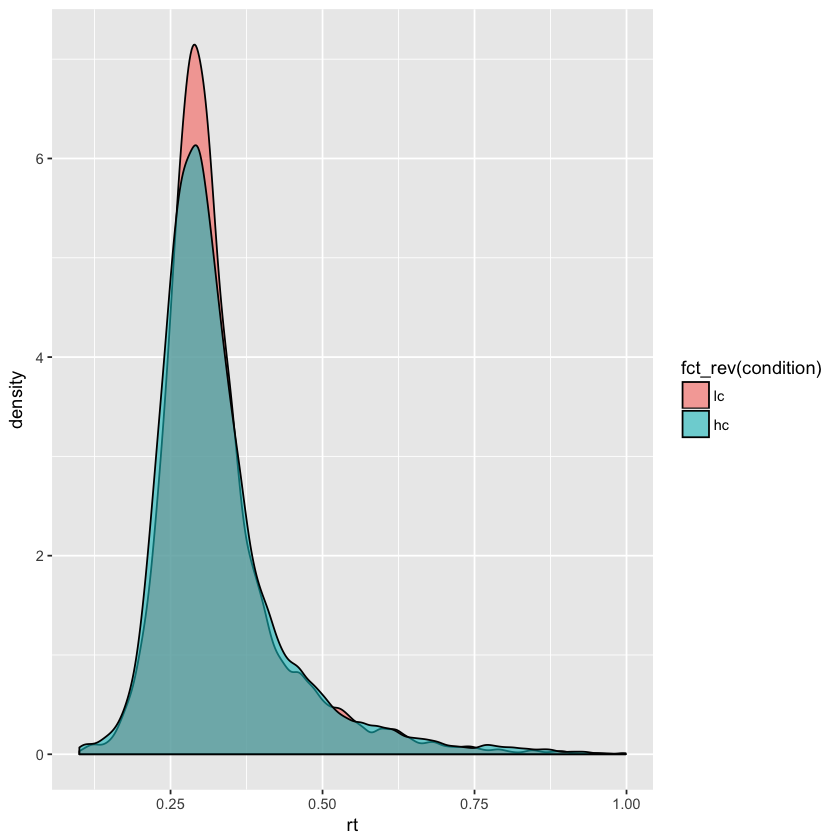

In [85]:
ggplot(subset(ls_obs_data, condition == 'lc' | condition == 'hc'), aes(rt, fill=fct_rev(condition))) + geom_density(alpha=0.6) 

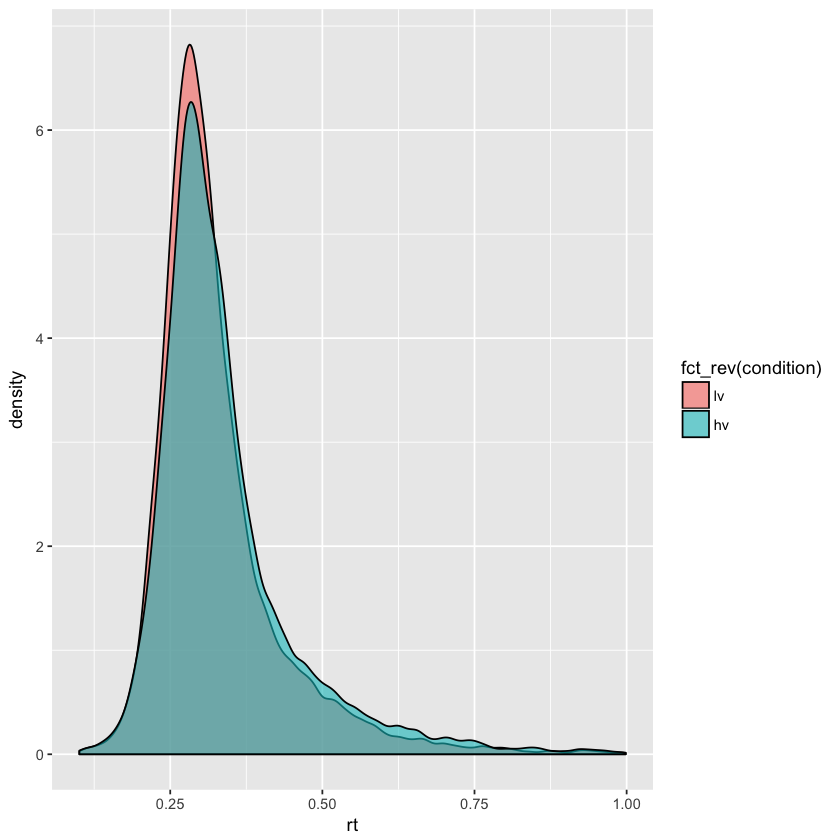

In [86]:
ggplot(subset(ls_obs_data, condition == 'lv' | condition == 'hv'), aes(rt, fill=fct_rev(condition))) + geom_density(alpha=0.6) 

In [87]:
head(ls_obs_data)
#names(ls_obs_data)

cpp        target_B   choice_B  cp gen_drift   gen_bound ID  b_t0     
1 0.09947117  0.0000000 0.0000000 1   0.01357246 0.4164061 761 0.0000000
2 0.03507879  0.0000000 0.0000000 0   0.01357246 0.5994712 761 1.3902137
3 0.02307522 -1.2410069 1.2410069 0   0.01357246 0.5350788 761 0.7923717
4 0.01988090 -0.5957808 0.5957808 0  -1.00000000 0.5230752 761 0.5328022
5 0.01853869 -0.3061348 0.3061348 0  -1.00000000 0.5198809 761 0.3913762
6 0.26853762 -0.1393938 0.1393938 0  -1.00000000 0.5185387 761 0.3028040
  b_t1      r_t1     ⋯ epoch_trial_zero_idx epoch_trial_one_idx
1 0.0000000 2.528877 ⋯ 0                    1                  
2 0.1492068 0.000000 ⋯ 1                    2                  
3 0.1965910 0.000000 ⋯ 2                    3                  
4 0.2266674 0.000000 ⋯ 3                    4                  
5 0.2519824 0.000000 ⋯ 4                    5                  
6 0.2751190 3.036967 ⋯ 5                    6                  
  shifted_epoch_trial_zero_idx repeat_trial prop_112  n_epoch_trials
1 0                            1            0.3055556 36            
2 1                            2            0.3055556 36            
3 2                            3            0.3055556 36            
4 3                            4            0.3055556 36            
5 4                            5            0.3055556 36            
6 5                            6            0.3055556 36            
  p_id_solution obs_low_val_cue id_choice p_id_accuracy
1 111           111             111       1            
2 111           112             112       0            
3 111           112             111       1            
4 111           112             112       0            
5 111           112             111       1            
6 111           111             111       1

In [88]:
range(ls_obs_data$ideal_B); range(ls_obs_data$gen_drift); range(ls_obs_data$gen_bound)

[1] -5.113855  5.864852

[1] -1  1

[1] 0.2277476 1.4999416

In [89]:
sum(ls_obs_data$cpp > 1 |ls_obs_data$cpp < 0 )

[1] 0

In [90]:
#check calculated prop. 
sum(ls_obs_data$prop_112 > 1 | ls_obs_data$prop_112 < 0)

[1] 0

In [41]:
#use vectors of generative conflict and volatility parameters as predictors 
high_conflict_p = 0.65
mod_conflict_p = 0.75
low_conflict_p = 0.85

high_vol_lambda = 15
mod_vol_lambda = 25
low_vol_lambda = 35 

#generative conflict
ls_obs_data[ls_obs_data$condition == 'hc', 'reward_p'] = high_conflict_p
ls_obs_data[ls_obs_data$condition == 'lc', 'reward_p'] = low_conflict_p
ls_obs_data[ls_obs_data$condition == 'hv', 'reward_p'] = mod_conflict_p
ls_obs_data[ls_obs_data$condition == 'lv', 'reward_p'] = mod_conflict_p

#generative volatility
ls_obs_data[ls_obs_data$condition == 'hv', 'lambda'] = high_vol_lambda
ls_obs_data[ls_obs_data$condition == 'lv', 'lambda'] = low_vol_lambda
ls_obs_data[ls_obs_data$condition == 'hc', 'lambda'] = mod_vol_lambda
ls_obs_data[ls_obs_data$condition == 'lc', 'lambda'] = mod_vol_lambda

In [42]:
#use vectors of observed conflict and volatility parameters as predictors 
ls_obs_data$obs_lambda <- ls_obs_data$n_epoch_trials
#probability of reward for high-value target 
ls_obs_data$obs_reward_p <-  if_else(ls_obs_data$prop_112 < 0.5, 1-ls_obs_data$prop_112, ls_obs_data$prop_112)

In [43]:
names(ls_obs_data)

[1] "cpp"                          "target_B"                    
 [3] "choice_B"                     "cp"                          
 [5] "gen_drift"                    "gen_bound"                   
 [7] "ID"                           "b_t0"                        
 [9] "b_t1"                         "r_t1"                        
[11] "r_t2"                         "obs_cp"                      
[13] "ideal_B"                      "B_ideal_target"              
[15] "B_nonideal_target"            "LR_choice"                   
[17] "obs_LR_accuracy"              "obs_LR_solution"             
[19] "reward"                       "cumulative_reward"           
[21] "rt"                           "total_trial_time"            
[23] "iti"                          "cp_with_slow_fast"           
[25] "obs_cp_with_slow_fast"        "obs_high_val_cue"            
[27] "condition"                    "coded_condition"             
[29] "original_trial"               "epoch_n"                     
[31] "epoch_trial"                  "shifted_epoch_trial"         
[33] "max_epoch_n"                  "epoch_trial_zero_idx"        
[35] "epoch_trial_one_idx"          "shifted_epoch_trial_zero_idx"
[37] "repeat_trial"                 "prop_112"                    
[39] "n_epoch_trials"               "p_id_solution"               
[41] "obs_low_val_cue"              "id_choice"                   
[43] "p_id_accuracy"                "cpp_scaled"                  
[45] "ideal_B_scaled"               "reward_p"                    
[47] "lambda"                       "obs_lambda"                  
[49] "obs_reward_p"

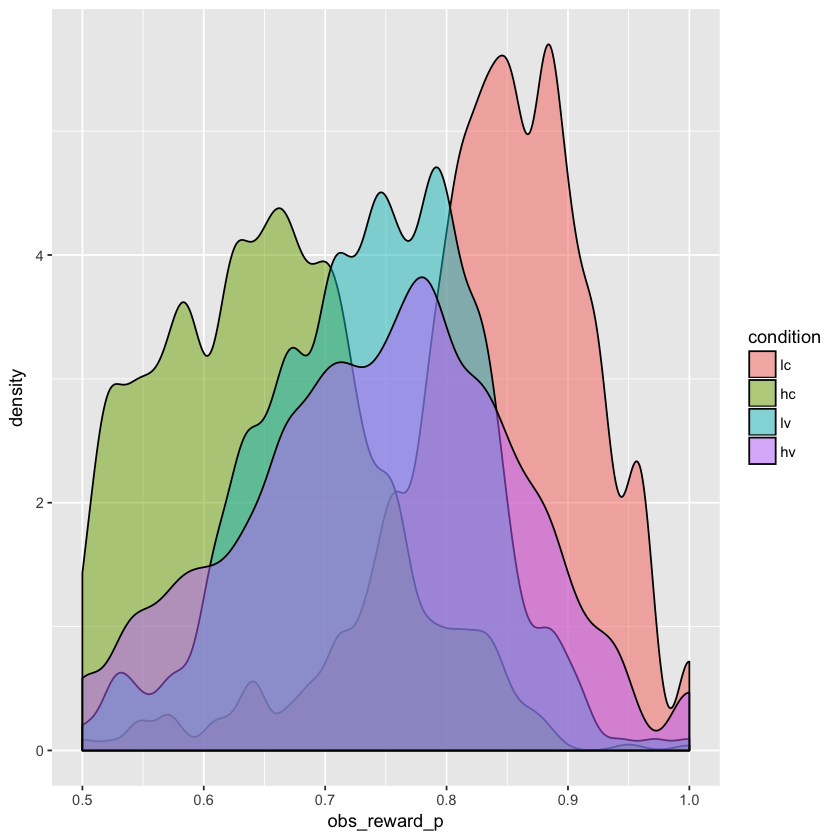

In [44]:
ggplot(ls_obs_data, aes(obs_reward_p, fill=condition)) + geom_density(alpha=0.5)

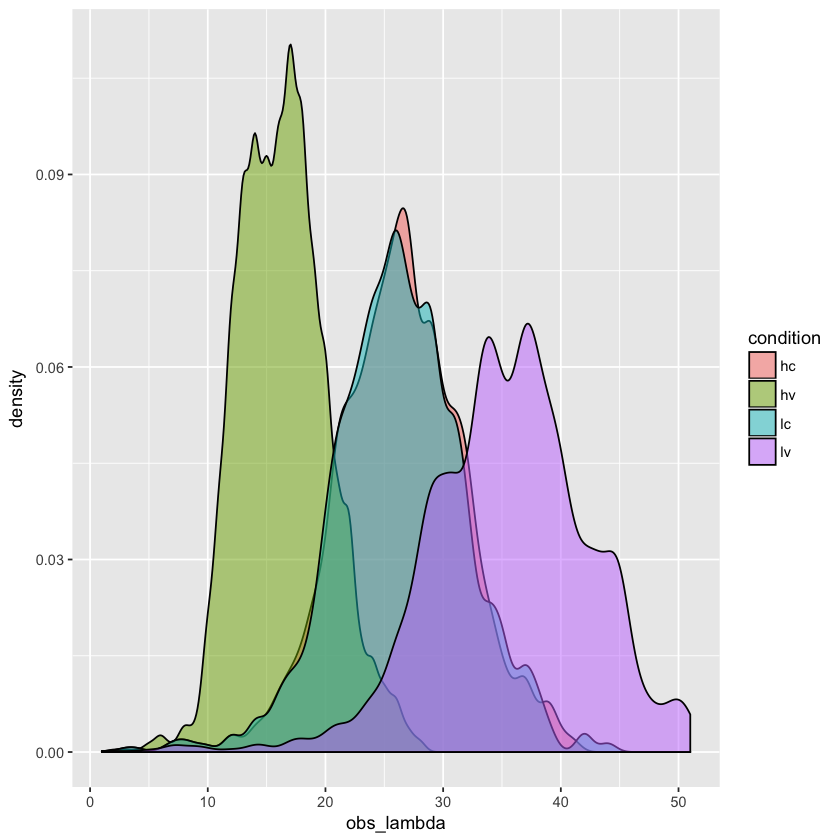

In [95]:
ggplot(ls_obs_data, aes(obs_lambda, fill=condition)) + geom_density(alpha=0.5)

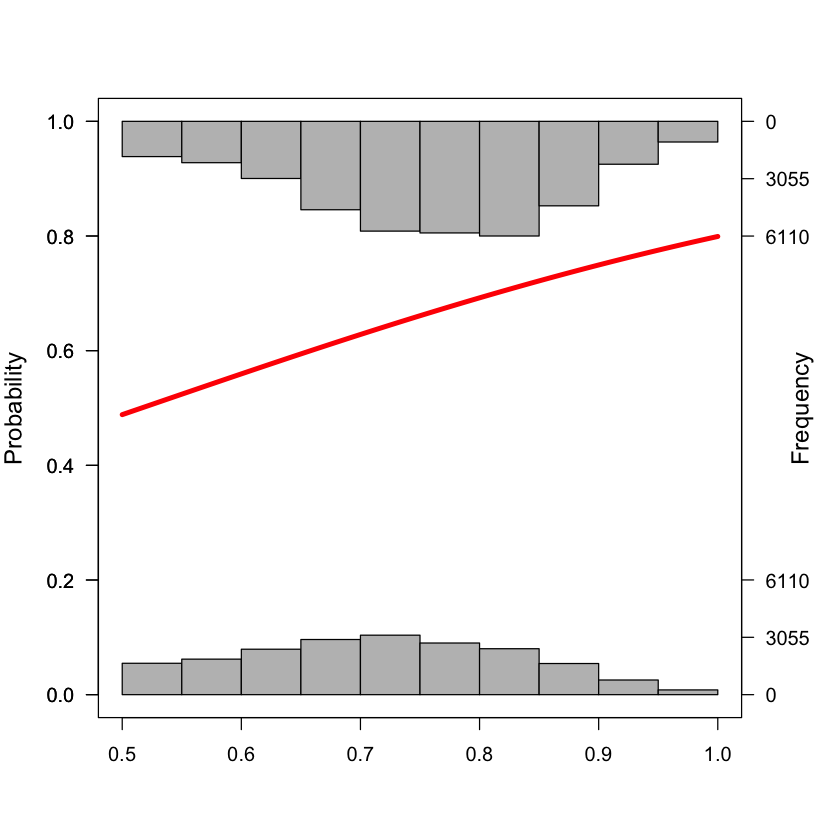

In [96]:
library(popbio)
logi.hist.plot(ls_obs_data$obs_reward_p,ls_obs_data$p_id_accuracy,boxp=FALSE,type="hist",col='gray')

In [97]:
#check for equal n
table(ls_obs_data$ID, ls_obs_data$condition)

table(ls_obs_data$lambda)
table(ls_obs_data$reward_p)

     
       hc  hv  lc  lv
  761 600 600 600 600
  762 600 600 600 600
  763 600 600 600 600
  764 600 600 600 600
  765 600 600 600 600
  766 600 600 600 600
  767 600 600 600 600
  768 600 600 600 600
  769 600 600 600 600
  770 600 600 600 600
  771 600 600 600 600
  772 600 600 600 600
  773 600 600 600 600
  774 600 600 600 600
  775 600 600 600 600
  776 600 600 600 600
  777 600 600 600 600
  778 600 600 600 600
  779 600 600 600 600
  780 600 600 600 600
  781 600 600 600 600
  782 600 600 600 600
  783 600 600 600 600
  784 600 600 600 600


   15    25    35 
14400 28800 14400 


 0.65  0.75  0.85 
14400 28800 14400 

In [98]:
# ls_obs_data[ls_obs_data$condition == 'hc', 'conflict'] = 'high'
# ls_obs_data[ls_obs_data$condition == 'lc', 'conflict'] = 'low'
# ls_obs_data[ls_obs_data$condition == 'hc', 'vol'] = 'mod'
# ls_obs_data[ls_obs_data$condition == 'lc', 'vol'] = 'mod'

# ls_obs_data[ls_obs_data$condition == 'hv', 'vol'] = 'high'
# ls_obs_data[ls_obs_data$condition == 'lv', 'vol'] = 'low'
# ls_obs_data[ls_obs_data$condition == 'hv', 'conflict'] = 'mod'
# ls_obs_data[ls_obs_data$condition == 'lv', 'conflict'] = 'mod'

In [45]:
#separate regressions for conflict & volatility 
head(ls_obs_data$condition)


ls_obs_data$cpp_scaled = scale(ls_obs_data$cpp)
ls_obs_data$ideal_B_scaled = scale(ls_obs_data$ideal_B)
ls_obs_data$lambda_scaled = scale(ls_obs_data$lambda )
ls_obs_data$reward_p_scaled = scale(ls_obs_data$reward_p  )

ls_obs_data$lambda_10 = ls_obs_data$lambda/10


ls_obs_data$obs_lambda_scaled = scale(ls_obs_data$obs_lambda  )

ls_obs_data$obs_reward_p_scaled = scale(ls_obs_data$obs_reward_p  )

ls_obs_data$log_rt <- log(ls_obs_data$rt)

# ls_obs_data$conflict <- as.factor(ls_obs_data$conflict)
# ls_obs_data$vol <- as.factor(ls_obs_data$vol)

#create two distinct dfs
conflict_df <- subset(ls_obs_data, condition == 'hc' | condition == 'lc')
vol_df <- subset(ls_obs_data, condition == 'hv' | condition == 'lv')

[1] hc hc hc hc hc hc
Levels: lc hc lv hv

In [100]:
ls_obs_data_cor <- cor(ls_obs_data[,c("cpp","target_B",
                                             "choice_B", "ideal_B", "rt", 
                                             "gen_drift", "gen_bound", "epoch_trial", "reward_p", 'lambda' )])

corrplot 0.84 loaded


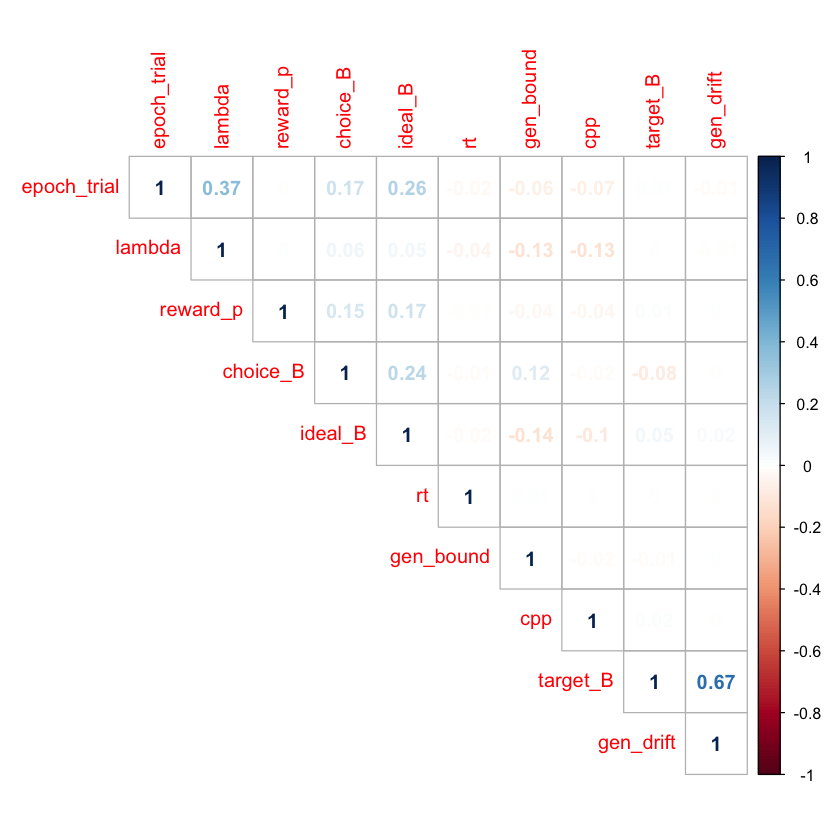

In [101]:
library(corrplot)
corrplot(ls_obs_data_cor, method="number", type="upper", order="hclust")

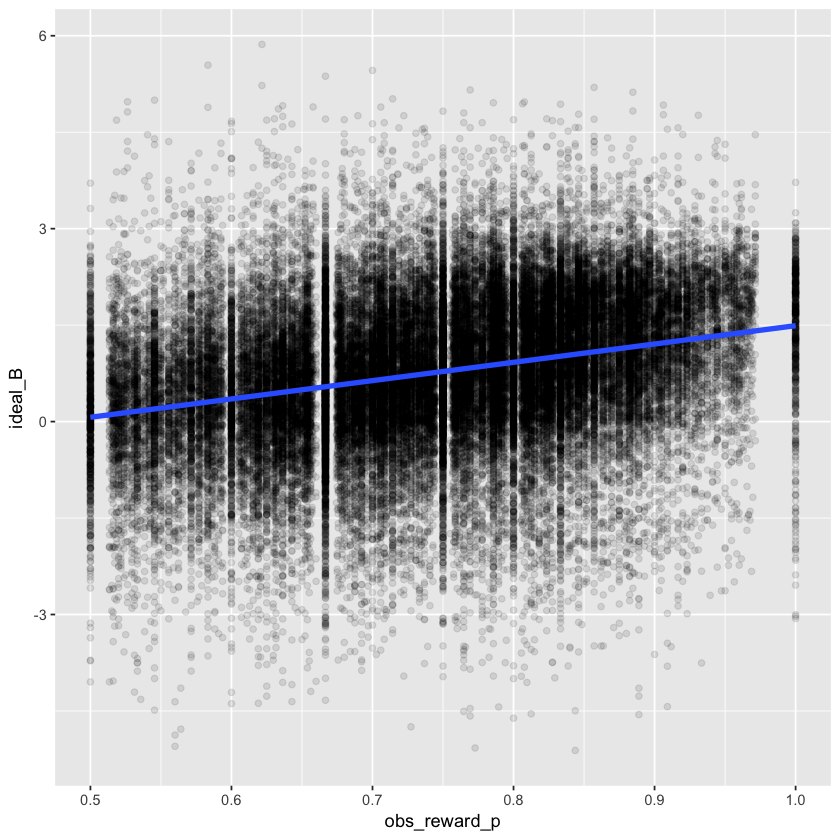

In [102]:
ggplot(ls_obs_data, aes(obs_reward_p, ideal_B)) + geom_point(alpha=0.1) + geom_smooth(method='lm', aes(), size=1.5)

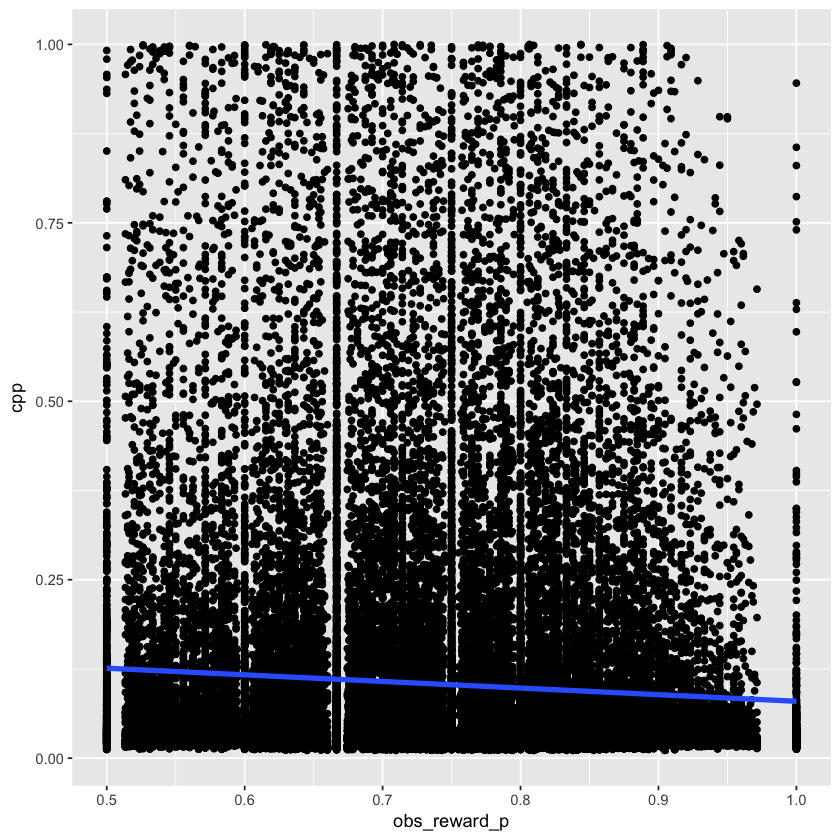

In [103]:
ggplot(ls_obs_data, aes(obs_reward_p, cpp)) + geom_point()+ geom_smooth(method='lm', aes(), size=1.5) 

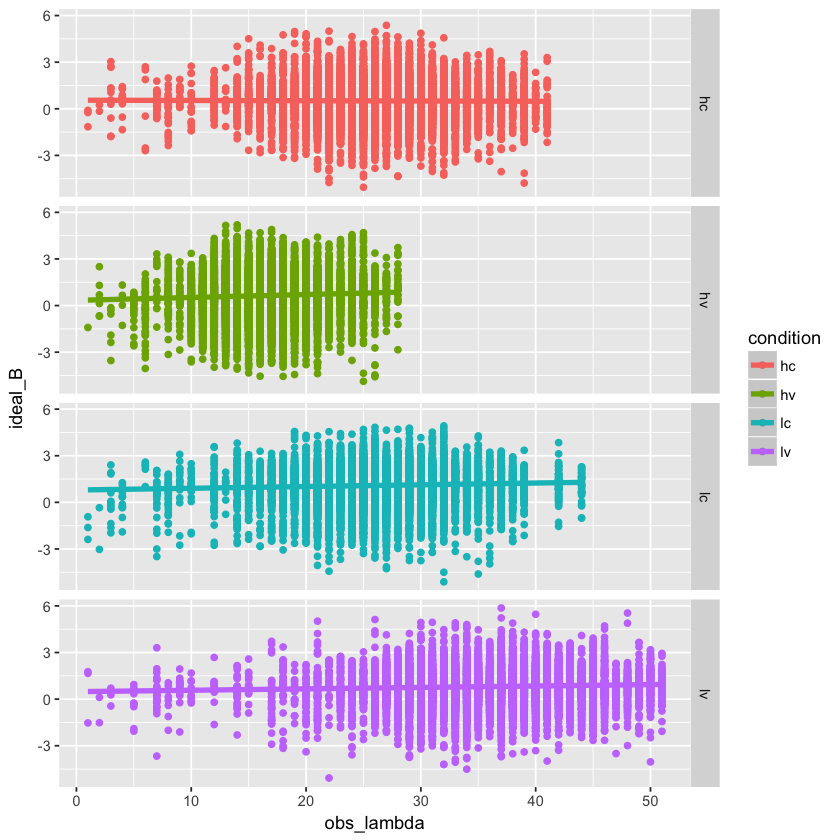

In [104]:
ggplot(ls_obs_data, aes(obs_lambda, ideal_B, col = condition)) + geom_point() + geom_smooth(method='lm', aes(), size=1.5) + facet_grid(condition ~.)

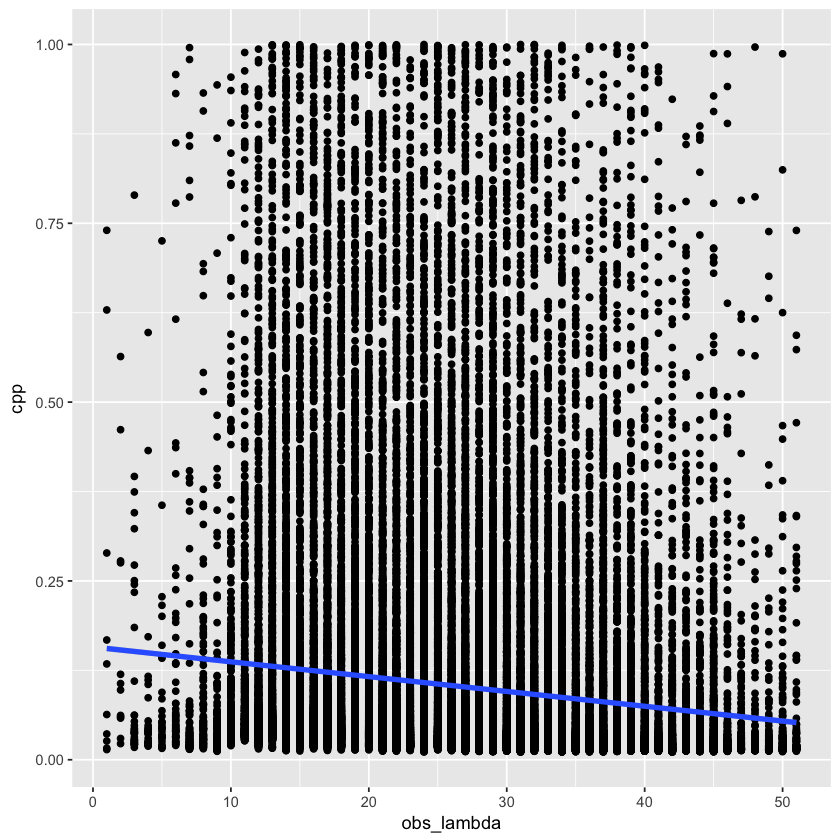

In [105]:
ggplot(ls_obs_data, aes(obs_lambda, cpp)) + geom_point() +  geom_smooth(method='lm', aes(), size=1.5) 

# Are learning signals correlated? 

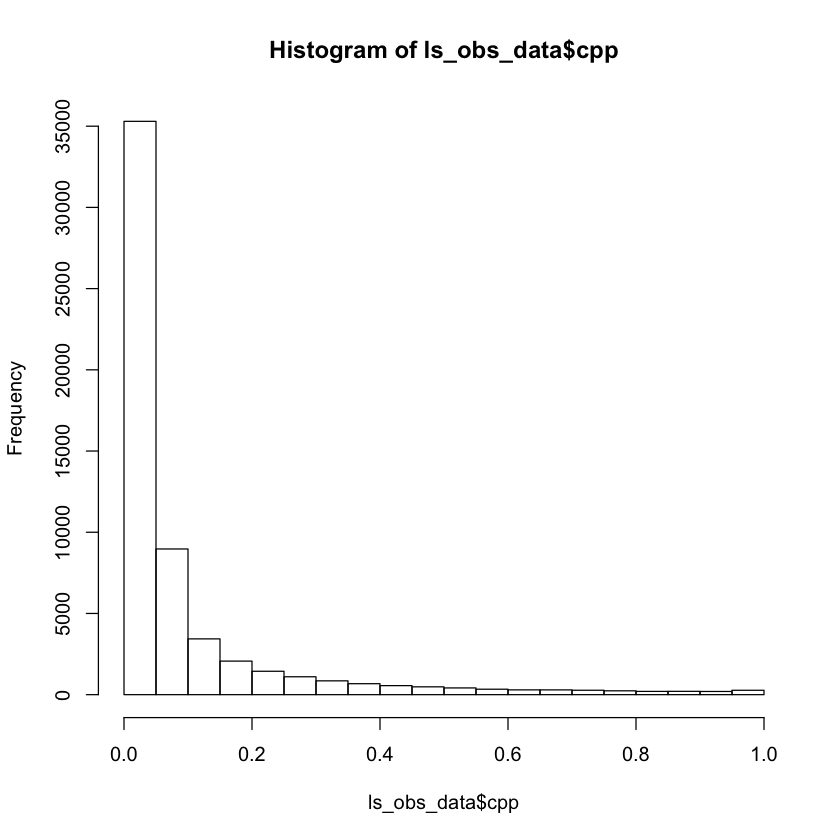

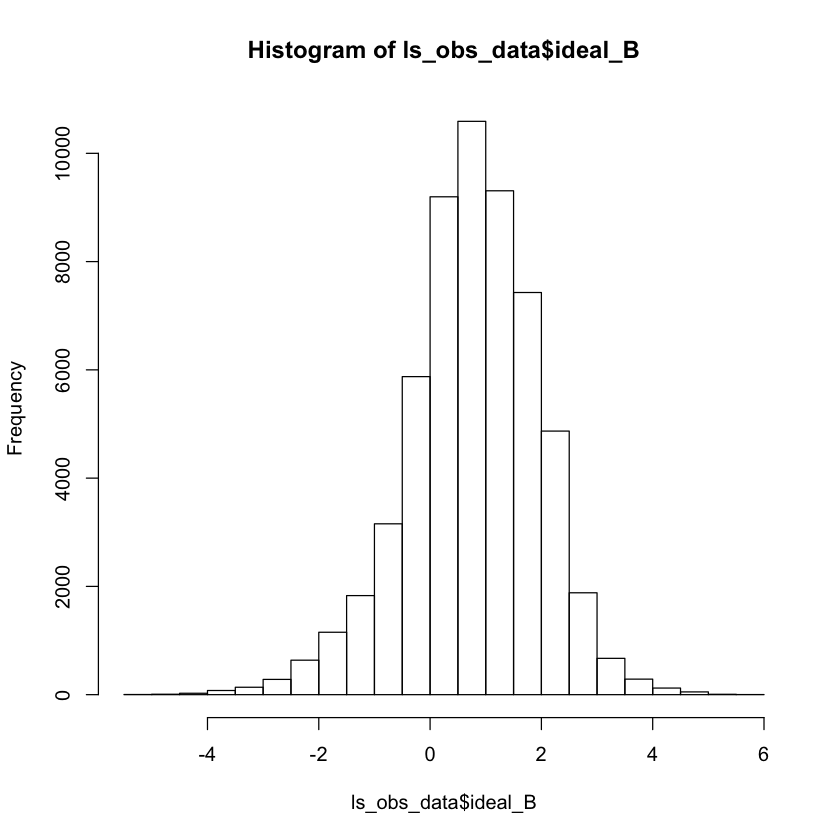

In [106]:
#test for correlation 
#if both have normal dist, use pearson 
#if not, use spearman
hist(ls_obs_data$cpp); hist(ls_obs_data$ideal_B)

## cpp & ideal_B have a weak but significant negative correlation, -0.15


In [107]:
#cpp & ideal_B have a weak but significant negative correlation, -0.15
cor.test(ls_obs_data$ideal_B, ls_obs_data$cpp, method='spearman', exact=FALSE)


	Spearman's rank correlation rho

data:  ls_obs_data$ideal_B and ls_obs_data$cpp
S = 3.6653e+13, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1507721 


In [108]:
cor.test(ls_obs_data$lambda, ls_obs_data$cpp, method='spearman', exact=FALSE)


	Spearman's rank correlation rho

data:  ls_obs_data$lambda and ls_obs_data$cpp
S = 4.3098e+13, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.3531435 


In [109]:
cor.test(ls_obs_data$reward_p, ls_obs_data$ideal_B, method='spearman', exact=FALSE)


	Spearman's rank correlation rho

data:  ls_obs_data$reward_p and ls_obs_data$ideal_B
S = 2.5533e+13, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1983328 


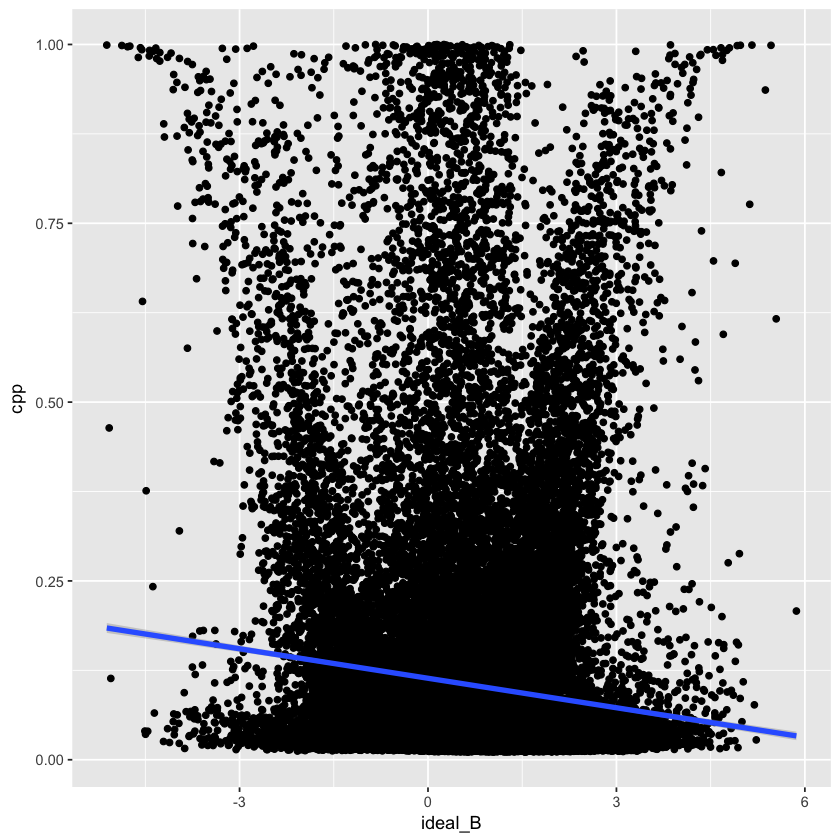

In [110]:
ggplot(ls_obs_data, aes(ideal_B, cpp)) + geom_point() +  geom_smooth(method='lm', aes(), size=1.5) 

In [ ]:
# unique(ls_obs_data$vol)
# unique(ls_obs_data$conflict)

# Predictors
### Generative conflict & volatility parameters 
### * mean probability of reward for target with highest expected value, $p_r$
### * mean epoch length, $\lambda$
### Ideal observer learning signals 
### * change point probability, $\Omega$
### * belief in the difference of the reward value of the most rewarding target and the suboptimal target, $B_\Delta$
# Outcomes 
### Reaction time 
### Binary accuracy

# Statistical models 
### Because change point probability is correlated with belief, the effects of  change point probability & belief are modeled separately according to levels of volatility & conflict 
### $\hat{Y}_{rt_{vol}} = \beta_0 + \beta_{\lambda}\lambda+\beta_{\Omega}\Omega +\beta_{\lambda\Omega} \lambda\Omega + (1  | {\ ID}) + \epsilon$

 ### $\hat{Y}_{rt_{conflict}} = \beta_0 + \beta_{p_r}p_r+\beta_{B_\Delta}B_\Delta +\beta_{p_rB_\Delta}p_rB_\Delta + (1 | {\ ID}) + \epsilon$
 
 ****
 ### $\hat{Y}_{acc_{vol}} = \beta_0 + \beta_{\lambda}\lambda+\beta_{\Omega}\Omega +\beta_{\lambda\Omega} \lambda\Omega + (1  | {\ ID}) + \epsilon$

 ### $\hat{Y}_{acc_{conflict}} = \beta_0 + \beta_{p_r}p_r+\beta_{B_\Delta}B_\Delta +\beta_{p_rB_\Delta}p_rB_\Delta + (1 | {\ ID}) + \epsilon$


In [ ]:
# obs_vol_rt_reg <- lmer(log_rt ~ obs_lambda_scaled*cpp_scaled + (1+obs_lambda_scaled+cpp_scaled| ID), vol_df)
# obs_vol_acc_reg <- glmer(p_id_accuracy ~ obs_lambda_scaled*cpp_scaled + (1+obs_lambda_scaled+cpp_scaled | ID),  
#                      family = 'binomial', vol_df)

In [ ]:
# AIC(gen_vol_rt_reg, gen_vol_rt_reg_unscaled); BIC(gen_vol_rt_reg, gen_vol_rt_reg_unscaled)
# AIC(gen_vol_acc_reg, gen_vol_acc_reg_unscaled); BIC(gen_vol_acc_reg, gen_vol_acc_reg_unscaled)

In [ ]:
# obs_conflict_rt_reg <- lmer(log_rt ~ obs_reward_p_scaled*ideal_B_scaled +  (1+obs_reward_p_scaled+ideal_B_scaled | ID), conflict_df)
# obs_conflict_acc_reg <- glmer(p_id_accuracy ~ obs_reward_p_scaled*ideal_B_scaled + (1+obs_reward_p_scaled+ideal_B_scaled  | ID),  family = 'binomial', conflict_df)

In [124]:
gen_conflict_rt_reg_unscaled <- lmer(log_rt ~ reward_p + (1| ID), conflict_df, control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=100000)))
gen_conflict_acc_reg_unscaled <- glmer(p_id_accuracy ~ reward_p + (1 | ID),  family = 'binomial', conflict_df, control=glmerControl(optimizer="bobyqa", optCtrl=list(maxfun=100000)))

In [129]:
summary(gen_conflict_rt_reg_unscaled)

Linear mixed model fit by REML ['lmerMod']
Formula: log_rt ~ reward_p + (1 | ID)
   Data: conflict_df
Control: lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

REML criterion at convergence: 5769.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6279 -0.5645 -0.0953  0.4383  4.5227 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.006213 0.07882 
 Residual             0.071232 0.26689 
Number of obs: 28800, groups:  ID, 24

Fixed effects:
             Estimate Std. Error t value
(Intercept) -1.155455   0.020011 -57.740
reward_p    -0.000976   0.015727  -0.062

Correlation of Fixed Effects:
         (Intr)
reward_p -0.589

In [128]:
summary(gen_conflict_acc_reg_unscaled)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: p_id_accuracy ~ reward_p + (1 | ID)
   Data: conflict_df
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
 35658.7  35683.5 -17826.4  35652.7    28797 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0627 -1.1543  0.5592  0.7307  1.1617 

Random effects:
 Groups Name        Variance Std.Dev.
 ID     (Intercept) 0.1374   0.3707  
Number of obs: 28800, groups:  ID, 24

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.3535     0.1216  -11.13   <2e-16 ***
reward_p      2.7346     0.1275   21.45   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
         (Intr)
reward_p -0.776

In [ ]:
# gen_conflict_rt_reg <- lmer(log_rt ~ reward_p_scaled*ideal_B_scaled +  (1| ID), conflict_df)
# gen_conflict_acc_reg <- glmer(p_id_accuracy ~ reward_p_scaled*ideal_B_scaled + (1 | ID),  family = 'binomial', conflict_df)

In [ ]:
# gen_conflict_rt_reg_pred = predict(gen_conflict_rt_reg, type='response')
# gen_conflict_rt_reg_pred_trans = exp(gen_conflict_rt_reg_pred)

In [131]:
gen_vol_rt_reg_unscaled <- lmer(log_rt ~ lambda + (1| ID),  vol_df, control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=100000000)))
gen_vol_acc_reg_unscaled <- glmer(p_id_accuracy ~ lambda + (1 | ID),  
                     family = 'binomial', vol_df, control=glmerControl(optimizer="bobyqa", optCtrl=list(maxfun=100000000)))

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00247878 (tol = 0.001, component 1)”Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model is nearly unidentifiable: very large eigenvalue
 - Rescale variables?”

In [ ]:
# gen_vol_rt_reg <- lmer(log_rt ~ lambda_scaled*cpp_scaled + (1| ID),  vol_df)
# gen_vol_acc_reg <- glmer(p_id_accuracy ~ lambda_scaled*cpp_scaled + (1 | ID),  
#                      family = 'binomial', vol_df)

In [132]:
summary(gen_vol_rt_reg_unscaled)

Linear mixed model fit by REML ['lmerMod']
Formula: log_rt ~ lambda + (1 | ID)
   Data: vol_df
Control: lmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+08))

REML criterion at convergence: 6748.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.5347 -0.5693 -0.1196  0.4168  4.8648 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.008903 0.09435 
 Residual             0.073653 0.27139 
Number of obs: 28800, groups:  ID, 24

Fixed effects:
              Estimate Std. Error t value
(Intercept) -1.1000220  0.0197353  -55.74
lambda      -0.0017279  0.0001599  -10.80

Correlation of Fixed Effects:
       (Intr)
lambda -0.203

In [133]:
summary(gen_vol_acc_reg_unscaled)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: p_id_accuracy ~ lambda + (1 | ID)
   Data: vol_df
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+08))

     AIC      BIC   logLik deviance df.resid 
 36344.4  36369.2 -18169.2  36338.4    28797 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2306 -1.0926  0.6132  0.7209  1.0885 

Random effects:
 Groups Name        Variance Std.Dev.
 ID     (Intercept) 0.1722   0.415   
Number of obs: 28800, groups:  ID, 24

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 0.294874   0.090973   3.241  0.00119 ** 
lambda      0.013226   0.001259  10.504  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
       (Intr)
lambda -0.340
convergence code: 0
Model failed to converge with max|grad| = 0.00247878 (tol = 0.001, component 1)
Model is nearly

### The degree of conflict and the belief in the value of the most rewarding target interact to increase the odds of a correct selection by a factor of 2.6. 

In [ ]:
mean(conflict_df$ideal_B); mean(conflict_df$reward_p)

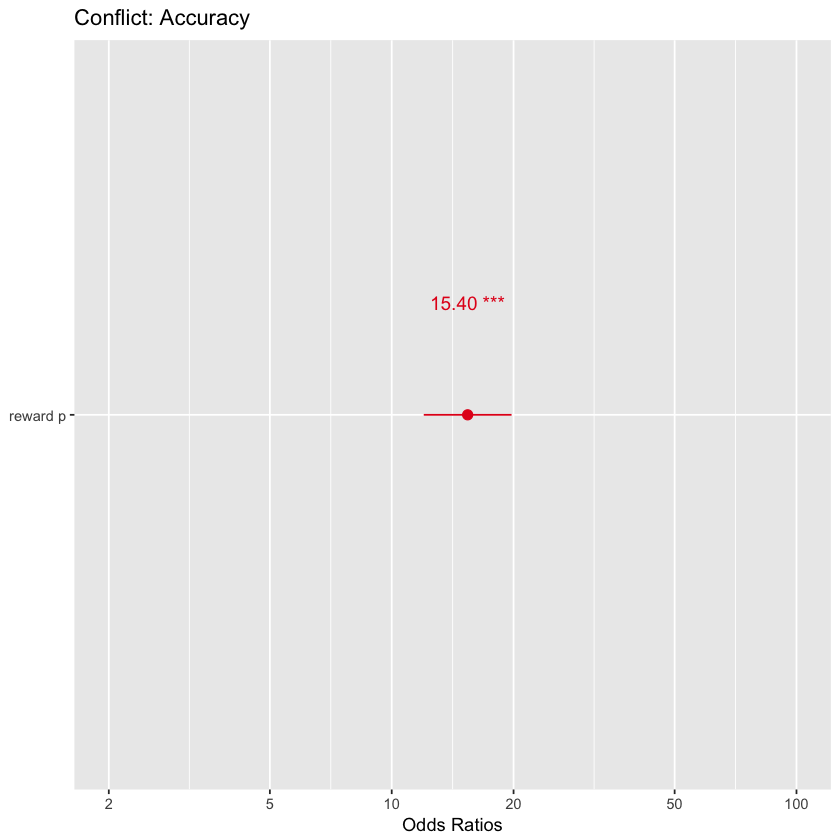

In [125]:
plot_model(gen_conflict_acc_reg_unscaled, show.values=TRUE, show.data=TRUE, 
           show.intercept = FALSE,  title='Conflict: Accuracy')

In [ ]:
# plot_model(gen_conflict_acc_reg, type = "int")

### No evidence that reaction time changes with the probability of reward for the most rewarding target or the belief in the value of the most rewarding target.

In [ ]:
exp(fixef(gen_conflict_rt_reg))

In [ ]:
(1-.999095237784382)*100

Computing p-values via Wald-statistics approximation (treating t as Wald z).


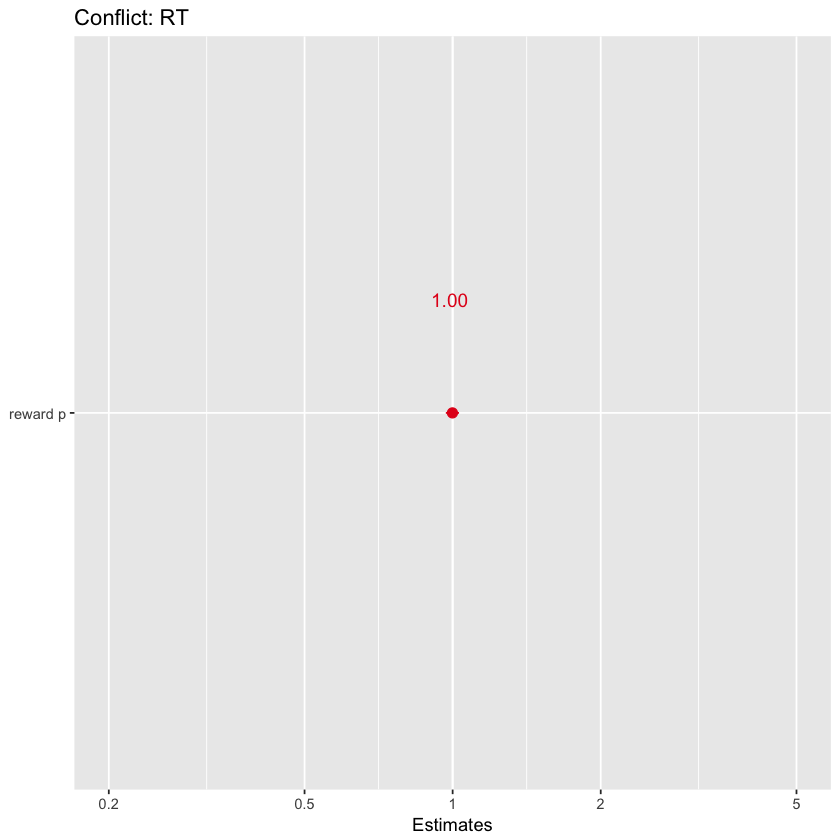

In [134]:
plot_model(gen_conflict_rt_reg_unscaled, show.values=TRUE, show.data=TRUE, 
           transform="exp",  title='Conflict: RT')

### For a one-unit increase in the length of the epoch, there's a 1% increase in the odds of choosing the most rewarding target. 


In [ ]:
mean(vol_df$cpp); mean(vol_df$lambda)

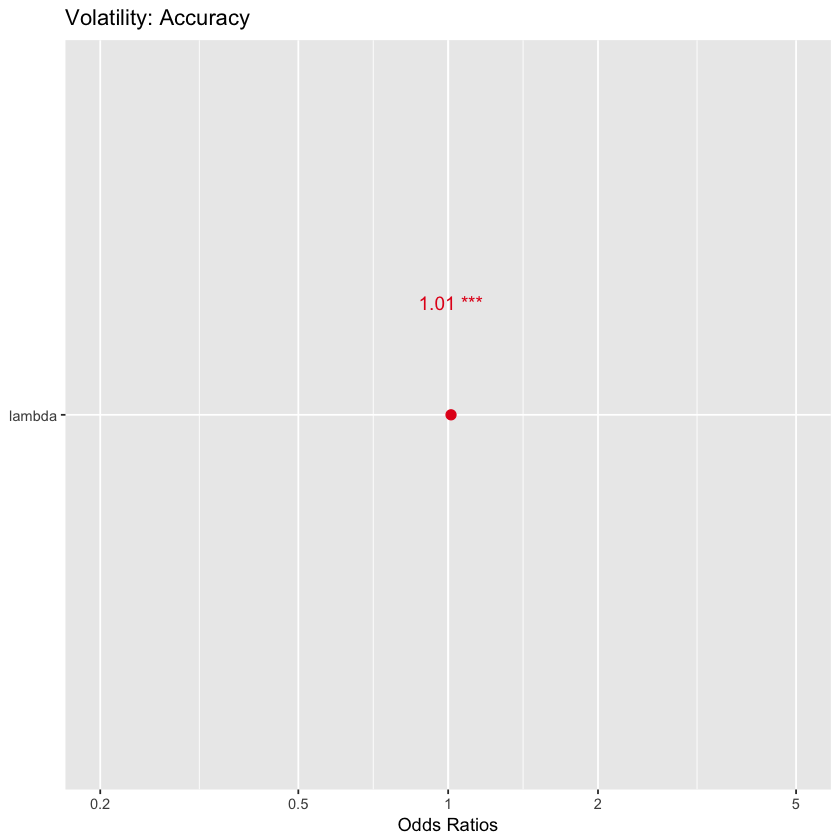

In [135]:
#trial stability instead of lambda
plot_model(gen_vol_acc_reg_unscaled, show.values=TRUE, show.data=TRUE,
             title='Volatility: Accuracy')

Computing p-values via Wald-statistics approximation (treating t as Wald z).


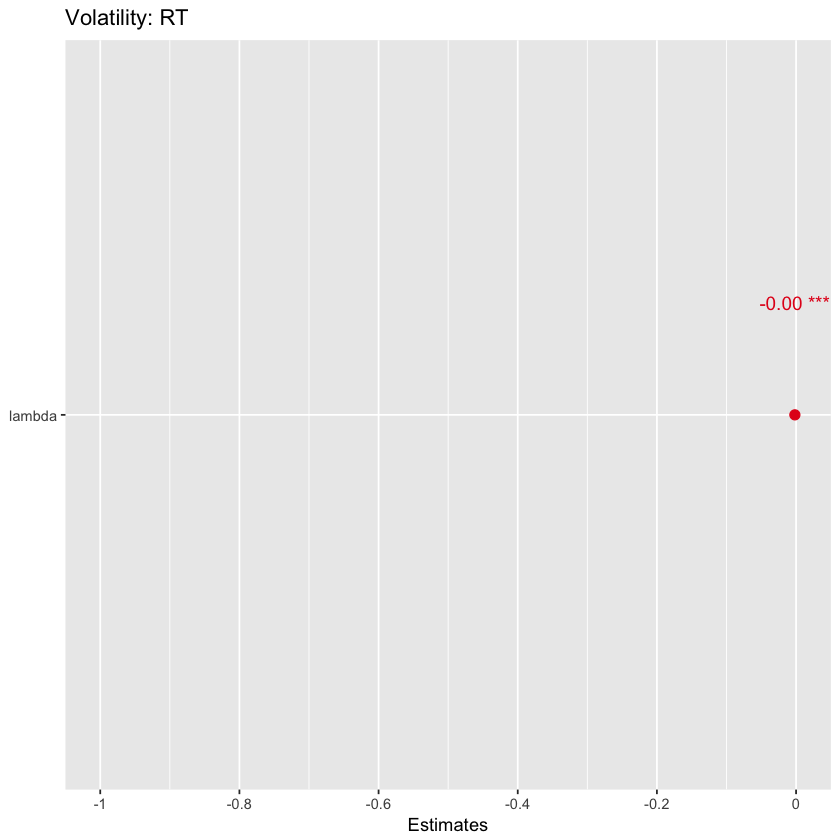

In [137]:
#trial stability instead of lambda
plot_model(gen_vol_rt_reg_unscaled, show.values=TRUE, show.data=TRUE,
             title='Volatility: RT')

### For a one-unit increase in the length of the epoch, reaction time decreases by 1.82 ms. No evidence that reaction time changes with change point probability.

In [ ]:
# exp(fixef(gen_vol_rt_reg_unscaled))

In [ ]:
# (1-0.99817264670919 )*1000

In [ ]:
# plot_model(gen_vol_rt_reg_unscaled, show.values=TRUE, show.data=TRUE, 
#            transform="exp", show.intercept = FALSE, title='Volatility: RT')

In [ ]:
# gen_conflict_acc_reg_sim <- simulate(gen_conflict_acc_reg, 24) 
# gen_conf_acc_reg_melt <- melt(gen_conflict_acc_reg_sim)

In [ ]:
#rerun the rt and acc models with ideal_B, cpp, cpp*ideal_B 
#add z to the pairwise comparisons for sim. and observed and look at which wins 
#just show means and distributions of rt and acc across conditions 

In [46]:
ls_rt <- lmer(log_rt ~ ideal_B*cpp +  (1| ID), ls_obs_data, control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=100000)))

In [1]:
ls_rt

ERROR: Error in eval(expr, envir, enclos): object 'ls_rt' not found


In [47]:
ls_acc <- glmer(p_id_accuracy ~ ideal_B*cpp + (1 | ID),  family = 'binomial', ls_obs_data, control=glmerControl(optimizer="bobyqa", optCtrl=list(maxfun=100000)))

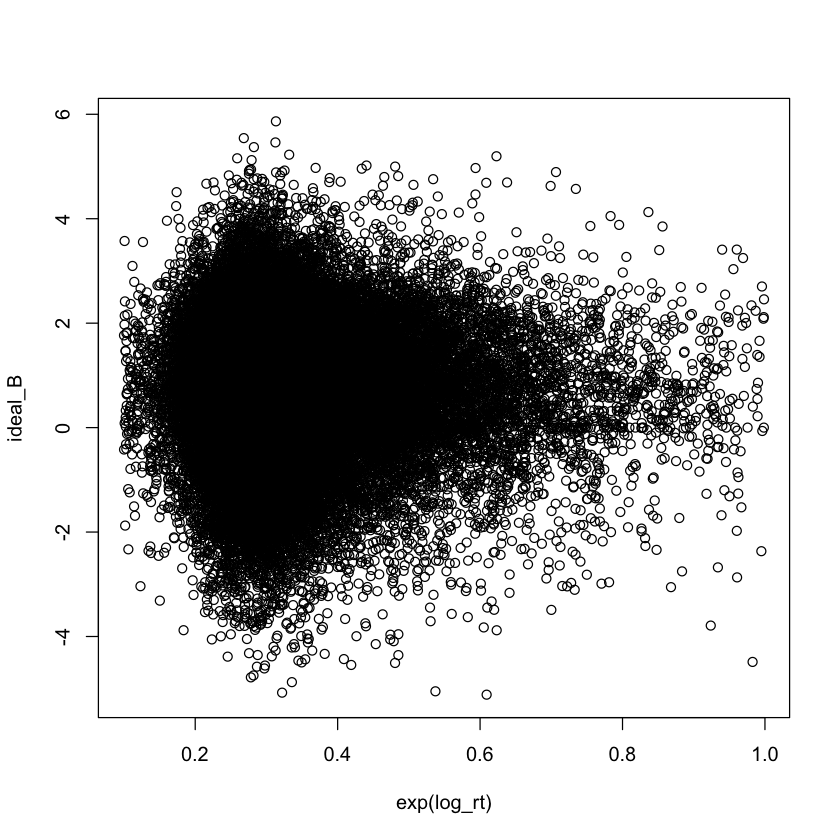

In [155]:
plot(exp(log_rt), ideal_B)

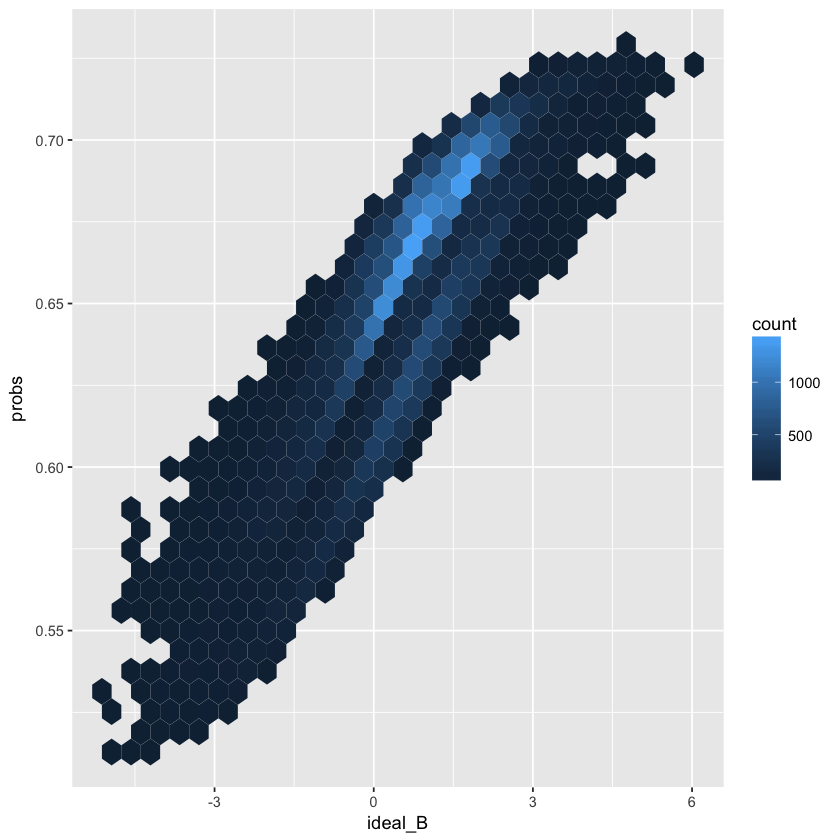

In [160]:
library(hexbin)
d <- ggplot(probs_df, aes(ideal_B, probs))
d + geom_hex()

In [256]:
x = confint(ls_rt)

Computing profile confidence intervals ...


In [260]:
exp(-0.004965319); exp(-0.0003043238)

[1] 0.995047

[1] 0.9996957

In [265]:
(1-.99) * 1000

[1] 10

In [267]:
exp(-0.004965319)

[1] 0.995047

In [261]:
(1-exp(-0.004965319))*1000

[1] 4.953012

In [268]:
(1-0.995046987818867 )*1000

[1] 4.953012

In [259]:
x

2.5 %        97.5 %       
.sig01       0.061533091  0.1091971348
.sigma       0.269520212  0.2726517026
(Intercept) -1.181895547 -1.1150758614
ideal_B     -0.004965319 -0.0003043238
cpp         -0.004100906  0.0239827733
ideal_B:cpp -0.011740906  0.0035984258

In [49]:
exp(fixef(ls_rt))

(Intercept)     ideal_B         cpp ideal_B:cpp 
  0.3171166   0.9973686   1.0099908   0.9959372

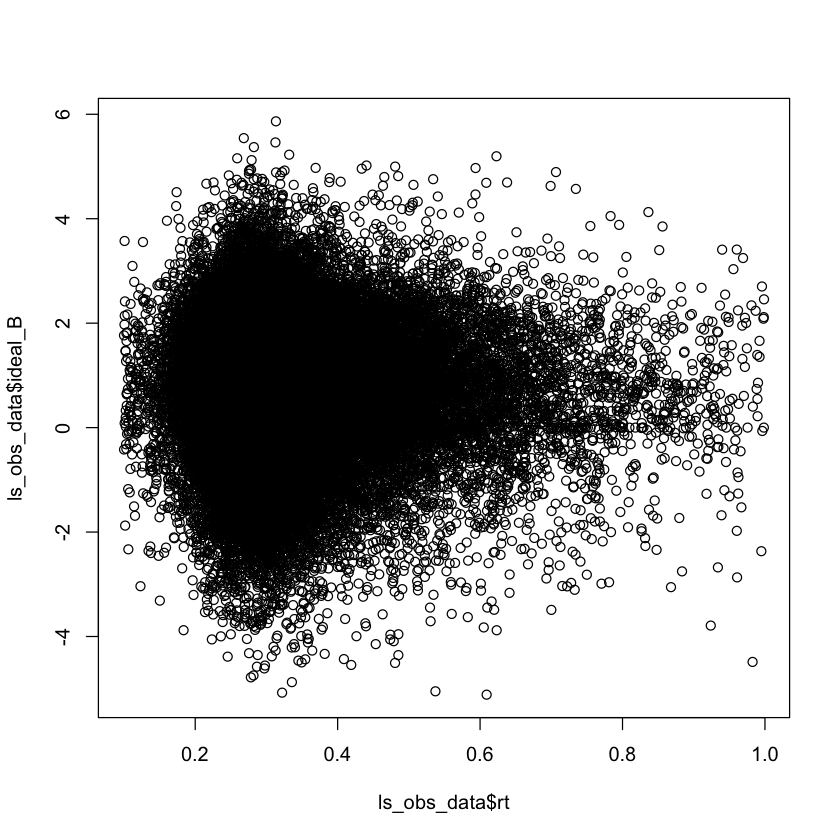

In [56]:
plot(ls_obs_data$rt[], ls_obs_data$ideal_B, lm)

In [55]:
summary(ls_acc)
confint(ls_acc)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: p_id_accuracy ~ ideal_B * cpp + (1 | ID)
   Data: ls_obs_data
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
 67983.2  68028.0 -33986.6  67973.2    57595 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.3318 -0.9983  0.4912  0.6916  4.4084 

Random effects:
 Groups Name        Variance Std.Dev.
 ID     (Intercept) 0.1684   0.4104  
Number of obs: 57600, groups:  ID, 24

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.28977    0.08473   3.420 0.000626 ***
ideal_B      0.57475    0.01054  54.538  < 2e-16 ***
cpp         -0.06587    0.05724  -1.151 0.249814    
ideal_B:cpp -0.23354    0.03451  -6.767 1.31e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) idel_B

Computing profile confidence intervals ...


In [269]:
exp(fixef(ls_acc))

(Intercept)     ideal_B         cpp ideal_B:cpp 
  1.3361136   1.7766873   0.9362560   0.7917293

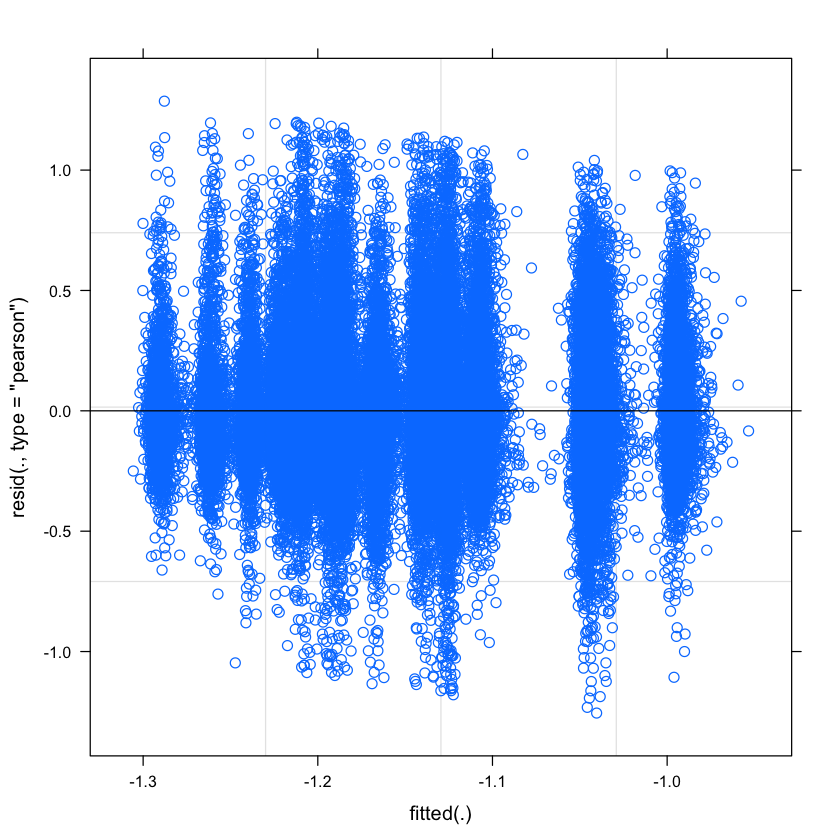

In [117]:
plot(ls_rt)

In [119]:
#when ideal_B increases, effect of cpp on accuracy decreases 
#know that cpp decreases as ideal_B increases  
exp(fixef(ls_acc))

(Intercept)     ideal_B         cpp ideal_B:cpp 
  1.3361136   1.7766873   0.9362560   0.7917293

In [120]:
pred <- predict(ls_acc,type='response') #b0 + b1x1 + b2x2 ...
probs <- exp(pred)/(1+exp(pred)) #probability that y=1 for each observation

In [138]:
probs_df <- data.frame(probs, ideal_B, cpp)

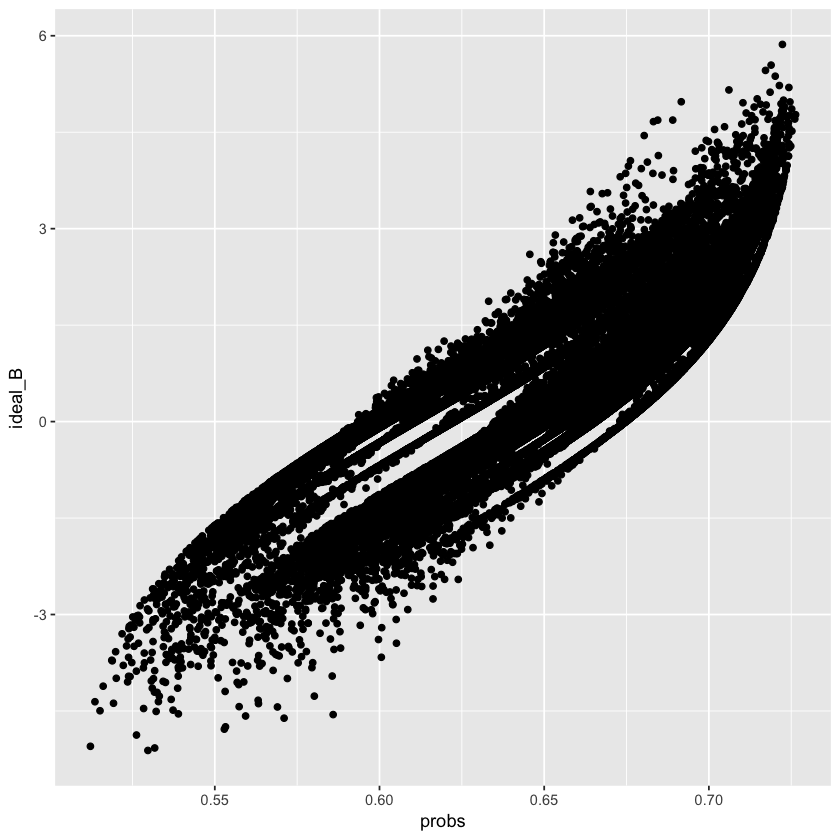

In [153]:
ggplot(probs_df, aes(probs, ideal_B)) + geom_point()


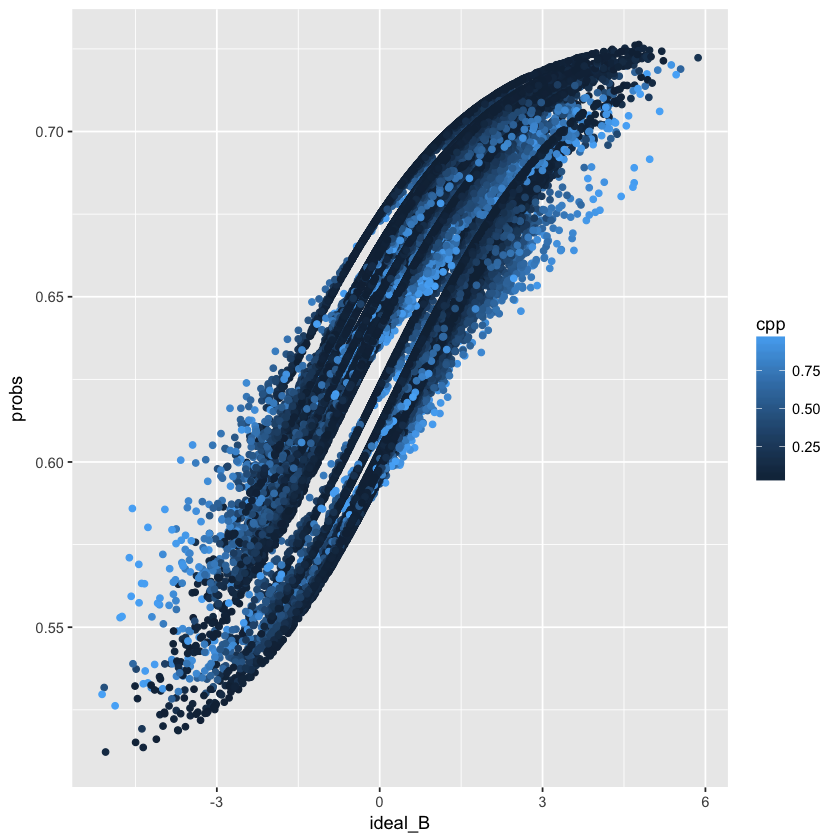

In [149]:
ggplot(probs_df, aes(ideal_B, probs, color=cpp)) + geom_point() + 


The following objects are masked from ls_obs_data (pos = 3):

    B_ideal_target, B_nonideal_target, b_t0, b_t1, choice_B,
    coded_condition, condition, cp, cp_with_slow_fast, cpp, cpp_scaled,
    cumulative_reward, epoch_n, epoch_trial, epoch_trial_one_idx,
    epoch_trial_zero_idx, gen_bound, gen_drift, ID, id_choice, ideal_B,
    ideal_B_scaled, iti, lambda, lambda_10, lambda_scaled, log_rt,
    LR_choice, max_epoch_n, n_epoch_trials, obs_cp,
    obs_cp_with_slow_fast, obs_high_val_cue, obs_lambda,
    obs_lambda_scaled, obs_low_val_cue, obs_LR_accuracy,
    obs_LR_solution, obs_reward_p, obs_reward_p_scaled, original_trial,
    p_id_accuracy, p_id_solution, prop_112, r_t1, r_t2, repeat_trial,
    reward, reward_p, reward_p_scaled, rt, shifted_epoch_trial,
    shifted_epoch_trial_zero_idx, target_B, total_trial_time

The following objects are masked from ls_obs_data (pos = 4):

    B_ideal_target, B_nonideal_target, b_t0, b_t1, choice_B,
    coded_condition, condition, cp, cp_with

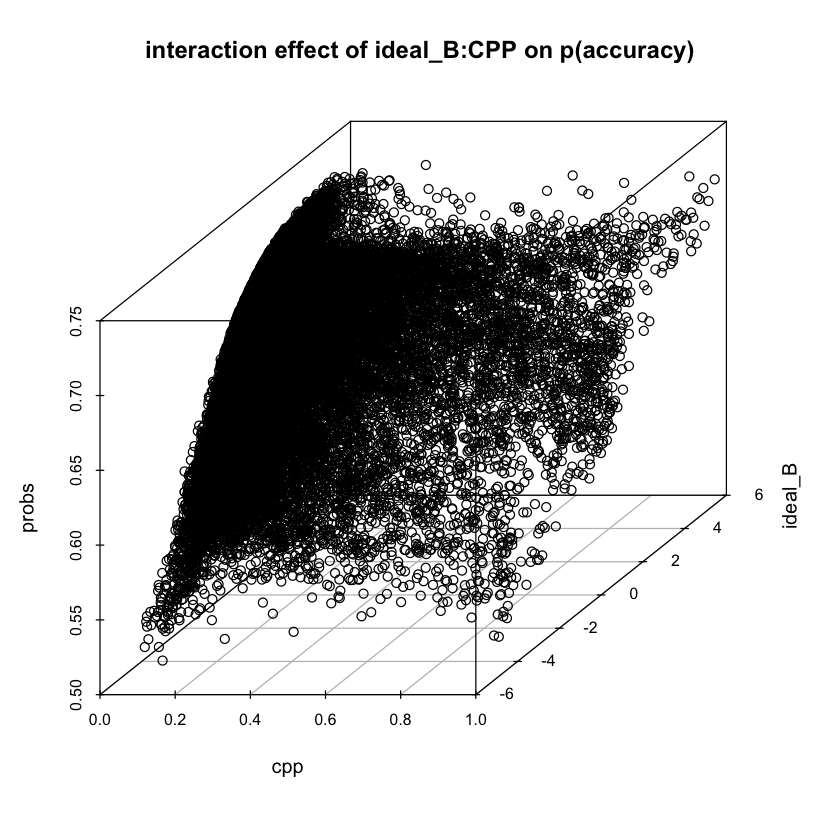

In [134]:
library(scatterplot3d)
attach(ls_obs_data)
scatterplot3d(cpp,ideal_B,probs, main="interaction effect of ideal_B:CPP on p(accuracy)")

In [ ]:
par(mfrow = c(1, 3))

# Intercorrelation pred1/pred2
plot(ideal_B ~ cpp, ls_obs_data)
lines(lowess(ls_obs_data$ideal_B, ls_obs_data$cpp), col = "red")

# Pred1 vs. outcome
plot(p_id_accuracy ~ ideal_B, ls_obs_data)
lines(lowess(df$pred1, df$outcome), col = "red")

# Pred2 vs. outcome
plot(p_id_accuracy ~ cpp, ls_obs_data)
lines(lowess(df$pred2, ls_obs_data$outcome), col = "red")

In [ ]:
library(boot)
set.seed(081318)
log_coef <- function(formula, data, indices) {
  d <- data[indices,] # allows boot to select sample 
  fit <- glmer(formula, data=d, family = binomial, control = glmerControl(optimizer = "bobyqa"),
    nAGQ = 10)
  return(fixef(fit))
} 

ls_acc_formula <- p_id_accuracy ~ ideal_B*cpp + (1 | ID)

# bootstrapping with 1000 replications 
ls_log_boot_results <- boot(formula=ls_acc_formula, data=ls_obs_data, 
  	R=1000, statistic=log_coef)


In [145]:
boot.ci(ls_log_boot_results, type='perc')

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 100 bootstrap replicates

CALL : 
boot.ci(boot.out = ls_log_boot_results, type = "perc")

Intervals : 
Level     Percentile     
95%   ( 0.2640,  0.3188 )  
Calculations and Intervals on Original Scale
Some percentile intervals may be unstable

In [115]:
lm_coef <- function(formula, data, indices) {
  d <- data[indices,] # allows boot to select sample 
  fit <- lmer(formula, data=d)
  return(fixef(fit))
} 

ls_rt_formula = log_rt ~ ideal_B*cpp +  (1| ID)

ls_lm_boot_results <- boot(formula=ls_rt_formula, data=ls_obs_data, 
  	R=1000, statistic=lm_coef)

ERROR: Error in boot(formula = ls_rt_formula, data = ls_obs_data, R = 100, statistic = lm_coef): could not find function "boot"


In [ ]:
# get 95% confidence interval for each coefficient
log_intercept_boot_ci <-boot.ci(ls_log_boot_results, type="perc", index=1) # intercept 
log_ideal_B_boot_ci <-boot.ci(ls_log_boot_results, type="perc", index=2) # ideal_B 
log_cpp_boot_ci <- boot.ci(ls_log_boot_results, type="perc", index=3) # cpp
idael_B.cpp_boot_ci <- boot.ci(ls_log_boot_results, type="perc", index=4) # ideal_B*cpp interaction

In [ ]:
# get 95% confidence interval for each coefficient
lm_intercept_boot_ci <-boot.ci(ls_lm_boot_results, type="perc", index=1) # intercept 
lm_ideal_B_boot_ci <-boot.ci(ls_lm_boot_results, type="perc", index=2) # ideal_B 
lm_cpp_boot_ci <- boot.ci(ls_lm_boot_results, type="perc", index=3) # cpp
idael_B.cpp_boot_ci <- boot.ci(ls_lm_boot_results, type="perc", index=4) # ideal_B*cpp interaction

In [ ]:
# #general effect of cpp & ideal_B
# ideal_B_rt <- lmer(log_rt ~ ideal_B +  (1| ID), conflict_df, control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=100000)))
# cpp_rt <- lmer(log_rt ~ cpp +  (1| ID), vol_df, control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=100000)))

# ideal_B_acc <- glmer(p_id_accuracy ~ ideal_B + (1 | ID),  family = 'binomial', conflict_df, control=glmerControl(optimizer="bobyqa", optCtrl=list(maxfun=100000)))
# cpp_acc <- glmer(p_id_accuracy ~ cpp + (1 | ID),  family = 'binomial', vol_df, control=glmerControl(optimizer="bobyqa", optCtrl=list(maxfun=100000)))

In [ ]:
# plot_model(ideal_B_rt,show.values=TRUE, show.data=TRUE,transform='exp')
# plot_model(cpp_rt,show.values=TRUE, show.data=TRUE,transform='exp')
# plot_model(ideal_B_acc,show.values=TRUE, show.data=TRUE,)
# plot_model(cpp_acc,show.values=TRUE, show.data=TRUE,)

In [ ]:
# qqnorm(ls_obs_data$log_rt); qqline(ls_obs_data$log_rt)